Датасет:
https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis

ДЗ:
1. Заполнить пропуски наиболее релеватным путем, аргументировать это.
2. Таргетом оставляем признак - болен аппендицитом или нет.
3. Построить три различные типа классификаторов, обязательно одну из них Keras или PyTorch. Построить графики функции потерь на трейне и тесте.
4. Визуализировать важность признаков с точки зрения модели - чемпиона.
5. Составить грамотный обобщающий вывод.

Сдавать как обычно - Гитхаб или Гугл Колаб.

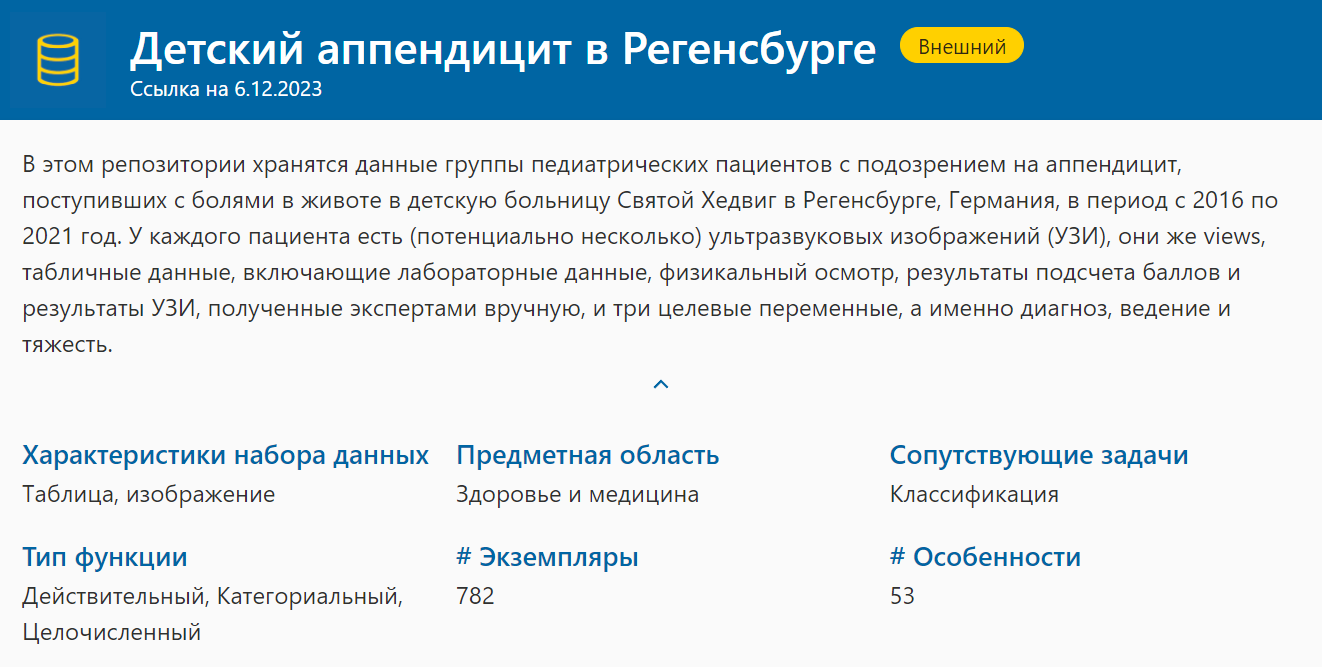



# Загрузка данных и библиотек

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)


{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

Информация о наборе данных

Дополнительная информация

Этот набор данных был получен в ходе ретроспективного исследования группы педиатрических пациентов, поступивших с болями в животе в детскую больницу Святой Хедвиг в Регенсбурге, Германия. У большинства пациентов было получено несколько ультразвуковых изображений брюшной полости В режиме B, количество просмотров варьировалось от 1 до 15. Изображения изображают различные области, представляющие интерес, такие как правый нижний квадрант брюшной полости, аппендикс, кишечник, лимфатические узлы и репродуктивные органы. Наряду с несколькими снимками УЗИ для каждого пациента, набор данных включает информацию, охватывающую лабораторные тесты, результаты физического обследования, клинические оценки, такие как оценки Альварадо и детского аппендицита, а также результаты УЗИ, подготовленные экспертами. Наконец, испытуемые были помечены по трем целевым переменным: диагноз (аппендицит или отсутствие аппендицита), лечение (хирургическое или консервативное) и тяжесть (осложненный или неосложненный аппендицит или отсутствие аппендицита). Исследование было одобрено Комитетом по этике Университета Регенсбурга (№ 18-1063-101, 18-1063_1-101 и 18-1063_2-101) и проводилось в соответствии с применимыми руководящими принципами и правилами.

Дополнительная информация о переменных

Метки классов

Диагноз: [аппендицит, отсутствие аппендицита], / Diagnosis: [appendicitis, no appendicitis],

Тяжесть: [осложненный, неосложненный], / Severity: [complicated, uncomplicated],

Лечение: [консервативное, первичное хирургическое, вторичное хирургическое, одномоментная аппендэктомия] / Management: [conservative, primary surgical, secondary surgical, simultaneous appendectomy]

In [3]:
!pip install adjdatatools

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from adjdatatools.preprocessing import AdjustedScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from keras.layers import Input
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

import warnings as wr
wr.filterwarnings('ignore')

In [5]:
df = pd.concat([X, y], axis=1)
df

Age    BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.68  16.90  female   148.0    37.0             3.0             4.0   
1    14.10  31.90    male   147.0    69.5             2.0             5.0   
2    14.14  23.30  female   163.0    62.0             4.0             5.0   
3    16.37  20.60  female   165.0    56.0             3.0             7.0   
4    11.08  16.90  female   163.0    45.0             3.0             5.0   
..     ...    ...     ...     ...     ...             ...             ...   
777  12.41  25.25  female   166.5    70.0             4.0             8.0   
778  17.09  20.43  female   158.0    51.0             6.0             5.0   
779  14.99  19.91  female   152.0    46.0             4.0             5.0   
780   7.20  14.30    male   129.3    23.9             5.0             9.0   
781  11.51  18.17    male   146.5    39.0             4.0             2.0   

     Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter  ...  \
0                              3.0            yes                7.1  ...   
1                              4.0             no                NaN  ...   
2                              3.0             no                NaN  ...   
3                              6.0             no                NaN  ...   
4                              6.0            yes                7.0  ...   
..                             ...            ...                ...  ...   
777                            7.0            yes                7.5  ...   
778                            3.0             no                NaN  ...   
779                            3.0             no                NaN  ...   
780                            8.0            yes               14.0  ...   
781                            2.0            yes                8.0  ...   

    Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
0                     NaN                         NaN   NaN         NaN   
1                     NaN                         NaN   NaN         NaN   
2                     NaN                         NaN   NaN         NaN   
3                     NaN                         NaN   NaN         NaN   
4                     NaN                         NaN   NaN         NaN   
..                    ...                         ...   ...         ...   
777                   NaN                         NaN   NaN         NaN   
778                   yes                         yes   NaN         NaN   
779                   NaN                         NaN   NaN         NaN   
780                   yes                         NaN    no         NaN   
781                   NaN                         NaN   yes         NaN   

    Meteorism Enteritis  Gynecological_Findings          Management  \
0         NaN       NaN                     NaN        conservative   
1         yes       NaN                     NaN        conservative   
2         yes       yes                     NaN        conservative   
3         NaN       yes                     NaN        conservative   
4         NaN       yes                     NaN        conservative   
..        ...       ...                     ...                 ...   
777       NaN       NaN                     NaN    primary surgical   
778       NaN       NaN                     NaN  secondary surgical   
779       NaN       NaN             unauffällig    primary surgical   
780       NaN       NaN                     NaN    primary surgical   
781       NaN       NaN                     NaN    primary surgical   

          Severity        Diagnosis  
0    uncomplicated     appendicitis  
1    uncomplicated  no appendicitis  
2    uncomplicated  no appendicitis  
3    uncomplicated  no appendicitis  
4    uncomplicated     appendicitis  
..             ...              ...  
777  uncomplicated     appendicitis  
778    complicated     appendicitis  
779  uncomplicated     appendicitis  
780  uncomplicated     

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [7]:
df.isna().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18
Ketones_in_Urine                    200
RBC_in_Urine                        206
WBC_in_Urine                        199
CRP                                  11
Dysuria                              29
Stool                                17
Peritonitis                           9
Psoas_Sign                           37
Ipsilateral_Rebound_Tenderness      163
US_Performed                          4
Free_Fluids                          63
Appendix_Wall_Layers                564
Target_Sign                         644
Appendicolith                       713
Perfusion                           719
Perforation                         701
Surrounding_Tissue_Reaction         530
Appendicular_Abscess                697
Abscess_Location                    769
Pathological_Lymph_Nodes            579
Lymph_Nodes_Location                661
Bowel_Wall_Thickening               683
Conglomerate_of_Bowel_Loops         739
Ileus                               722
Coprostasis                         711
Meteorism                           642
Enteritis                           716
Gynecological_Findings              756
Management                            1
Severity                              1
Diagnosis                             2
dtype: int64

Посмотрим процент пропусков.

In [8]:
null_ = df.isna().sum() / len(df) * 100
null_ = pd.DataFrame({'feature':null_.index, 'null_percentage':null_}) \
                    .sort_values(by='null_percentage', ascending=False) \
                    .reset_index(drop=True)
null_

feature  null_percentage
0                   Abscess_Location        98.337596
1             Gynecological_Findings        96.675192
2        Conglomerate_of_Bowel_Loops        94.501279
3              Segmented_Neutrophils        93.094629
4                              Ileus        92.327366
5                          Perfusion        91.943734
6                          Enteritis        91.560102
7                      Appendicolith        91.176471
8                        Coprostasis        90.920716
9                        Perforation        89.641944
10              Appendicular_Abscess        89.130435
11             Bowel_Wall_Thickening        87.340153
12              Lymph_Nodes_Location        84.526854
13                       Target_Sign        82.352941
14                         Meteorism        82.097187
15          Pathological_Lymph_Nodes        74.040921
16              Appendix_Wall_Layers        72.122762
17       Surrounding_Tissue_Reaction        67.774936
18                 Appendix_Diameter        36.317136
19                      RBC_in_Urine        26.342711
20                  Ketones_in_Urine        25.575448
21                      WBC_in_Urine        25.447570
22    Ipsilateral_Rebound_Tenderness        20.843990
23             Neutrophil_Percentage        13.171355
24                       Free_Fluids         8.056266
25     Paedriatic_Appendicitis_Score         6.649616
26                    Alvarado_Score         6.649616
27                      Neutrophilia         6.393862
28                        Psoas_Sign         4.731458
29                           Dysuria         3.708440
30                               BMI         3.452685
31                               RDW         3.324808
32                            Height         3.324808
33                         RBC_Count         2.301790
34                        Hemoglobin         2.301790
35                 Thrombocyte_Count         2.301790
36                             Stool         2.173913
37                     Coughing_Pain         2.046036
38  Contralateral_Rebound_Tenderness         1.918159
39                               CRP         1.406650
40                  Loss_of_Appetite         1.278772
41                    Migratory_Pain         1.150895
42                       Peritonitis         1.150895
43                            Nausea         1.023018
44              Lower_Right_Abd_Pain         1.023018
45                  Body_Temperature         0.895141
46                         WBC_Count         0.767263
47                    Appendix_on_US         0.639386
48                      US_Performed         0.511509
49                    Length_of_Stay         0.511509
50                            Weight         0.383632
51                         Diagnosis         0.255754
52                               Sex         0.255754
53                        Management         0.127877
54                          Severity         0.127877
55                               Age         0.127877

In [9]:
for col in list(df.columns):
  print(col, df[col].unique())

Age [12.68       14.1        14.14       16.37       11.08       11.05
  8.98        7.06        7.9        14.34       11.87       16.28
  9.4        12.48       15.98       14.93       13.39       17.24
 10.58       14.74       16.66       11.18       13.6        13.89
 15.92       13.26        8.69       17.82       10.51       13.54
 15.7        10.55       10.36        5.33       11.4         7.84
  5.71       14.15       13.38       15.9        15.89       10.13
  3.79        9.49       16.83       12.16       11.38       13.57
 15.72       12.06       16.8         3.99        7.2        10.01
  9.18       11.88        6.9        17.79        8.5        17.66
  4.39       16.31       15.83       14.66       14.57       12.27
  9.1        11.3         8.47       15.66       12.7        10.49
 13.98        9.39        8.73        8.16       14.23       15.09
 12.1        15.37       10.59       16.29        8.83        6.29
  6.76       10.78       17.72        9.53        6.39    

In [10]:
df[df.isnull().all(1)]

Age  BMI  Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
428  NaN  NaN  NaN     NaN     NaN             NaN             NaN   

     Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter  ...  \
428                            NaN            NaN                NaN  ...   

    Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
428                   NaN                         NaN   NaN         NaN   

    Meteorism Enteritis  Gynecological_Findings  Management  Severity  \
428       NaN       NaN                     NaN         NaN       NaN   

     Diagnosis  
428        NaN  

[1 rows x 56 columns]

## Удаление пустой строки

In [11]:
df.shape

(782, 56)

In [12]:
df = df.dropna(how='all')
df.shape

(781, 56)

In [13]:
df['Diagnosis'].isna().sum()

1

Есть пропущенное значение в таргете. Необходимо его удалить.

## Удаление пропусков в таргете

In [14]:
df = df.dropna(subset='Diagnosis')
df['Diagnosis'].isna().sum()

0

Заменим пропущенные значения в переменных на -1, т.к. больше всего пропусков в тех признаках, которые реже встречаются. Возможно, что значения не проставлены, т.к. не было абсцесса, гинекологических находок или конгломерата кишечных петель, например, или в анализе крови не были посчитаны сементоядерные нейтрофилы, т.к. были посчитаны нейтрофилы в процентах, или не было оснований делать какие-то из анализов или исследований, т.к. состояние пациента этого не требовало. Т.е. отсутствие каких-либо данных может быть признаком.

## Замена пропусков на -1

In [15]:
df_notnan = df.fillna(-1)

In [16]:
df_notnan.isna().sum()

Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Segmented_Neutrophils               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_Urine                    0
RBC_in_Urine                        0
WBC_in_Urine                        0
CRP                                 0
Dysuria                             0
Stool                               0
Peritonitis                         0
Psoas_Sign                          0
Ipsilateral_Rebound_Tenderness      0
US_Performed                        0
Free_Fluids                         0
Appendix_Wall_Layers                0
Target_Sign                         0
Appendicolith                       0
Perfusion                           0
Perforation                         0
Surrounding_Tissue_Reaction         0
Appendicular_Abscess                0
Abscess_Location                    0
Pathological_Lymph_Nodes            0
Lymph_Nodes_Location                0
Bowel_Wall_Thickening               0
Conglomerate_of_Bowel_Loops         0
Ileus                               0
Coprostasis                         0
Meteorism                           0
Enteritis                           0
Gynecological_Findings              0
Management                          0
Severity                            0
Diagnosis                           0
dtype: int64

##Удаление лишних таргетов

In [17]:
df_notnan = df_notnan.drop(['Severity', 'Management'], axis=1)
df_notnan.shape

(780, 54)

Заменим категориальные значения на числовые.

## Кодировка категориальных признаков с помощью LabelEncoder

In [18]:
df_notnan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 781
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               780 non-null    float64
 1   BMI                               780 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            780 non-null    float64
 4   Weight                            780 non-null    float64
 5   Length_of_Stay                    780 non-null    float64
 6   Alvarado_Score                    780 non-null    float64
 7   Paedriatic_Appendicitis_Score     780 non-null    float64
 8   Appendix_on_US                    780 non-null    object 
 9   Appendix_Diameter                 780 non-null    float64
 10  Migratory_Pain                    780 non-null    object 
 11  Lower_Right_Abd_Pain              780 non-null    object 
 12  Contralateral

In [19]:
cat_features = df_notnan.select_dtypes(include=['object']).columns.to_list()
cat_features

['Sex',
 'Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Neutrophilia',
 'Ketones_in_Urine',
 'RBC_in_Urine',
 'WBC_in_Urine',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'Ipsilateral_Rebound_Tenderness',
 'US_Performed',
 'Free_Fluids',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Pathological_Lymph_Nodes',
 'Lymph_Nodes_Location',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings',
 'Diagnosis']

In [20]:
for feature in cat_features:
  df_notnan[feature] = df_notnan[feature].astype('str')

In [21]:
LE = LabelEncoder()
for feature in cat_features:
  df_notnan[feature] = LE.fit_transform(df_notnan[feature])
df_notnan

Age    BMI  Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.68  16.90    1   148.0    37.0             3.0             4.0   
1    14.10  31.90    2   147.0    69.5             2.0             5.0   
2    14.14  23.30    1   163.0    62.0             4.0             5.0   
3    16.37  20.60    1   165.0    56.0             3.0             7.0   
4    11.08  16.90    1   163.0    45.0             3.0             5.0   
..     ...    ...  ...     ...     ...             ...             ...   
777  12.41  25.25    1   166.5    70.0             4.0             8.0   
778  17.09  20.43    1   158.0    51.0             6.0             5.0   
779  14.99  19.91    1   152.0    46.0             4.0             5.0   
780   7.20  14.30    2   129.3    23.9             5.0             9.0   
781  11.51  18.17    2   146.5    39.0             4.0             2.0   

     Paedriatic_Appendicitis_Score  Appendix_on_US  Appendix_Diameter  ...  \
0                              3.0               2                7.1  ...   
1                              4.0               1               -1.0  ...   
2                              3.0               1               -1.0  ...   
3                              6.0               1               -1.0  ...   
4                              6.0               2                7.0  ...   
..                             ...             ...                ...  ...   
777                            7.0               2                7.5  ...   
778                            3.0               1               -1.0  ...   
779                            3.0               1               -1.0  ...   
780                            8.0               2               14.0  ...   
781                            2.0               2                8.0  ...   

     Pathological_Lymph_Nodes  Lymph_Nodes_Location  Bowel_Wall_Thickening  \
0                           2                    24                      0   
1                           0                     0                      0   
2                           0                     0                      0   
3                           2                    24                      0   
4                           2                    24                      0   
..                        ...                   ...                    ...   
777                         0                     0                      0   
778                         0                     0                      2   
779                         0                     0                      0   
780                         1                     0                      2   
781                         2                    26                      0   

     Conglomerate_of_Bowel_Loops  Ileus  Coprostasis  Meteorism  Enteritis  \
0                              0      0            0          0          0   
1                              0      0            0          2          0   
2                              0      0            0          2          2   
3                              0      0            0          0          2   
4                              0      0            0          0          2   
..                           ...    ...          ...        ...        ...   
777                            0      0            0          0          0   
778                            2      0            0          0          0   
779                            0      0            0          0          0   
780                            0      1            0          0          0   
781                            0      2            0          0          0   

     Gynecological_Findings  Diagnosis  
0                         0          0  
1                         0          1  
2                         0          1  
3                         0          1  
4                         0          0  
..                      ...        ...  
777                 

Посмотрим статистические данные.

In [22]:
for col in list(df_notnan.columns):
  print(df_notnan[col].describe())

count    780.000000
mean      11.341831
std        3.529811
min        0.000000
25%        9.197500
50%       11.440000
75%       14.040000
max       18.360000
Name: Age, dtype: float64
count    780.000000
mean      18.241634
std        5.603097
min       -1.000000
25%       15.430000
50%       17.800000
75%       21.022500
max       38.160000
Name: BMI, dtype: float64
count    780.000000
mean       1.515385
std        0.502644
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Sex, dtype: float64
count    780.000000
mean     143.222051
std       32.660286
min       -1.000000
25%      135.000000
50%      149.000000
75%      162.075000
max      192.000000
Name: Height, dtype: float64
count    780.000000
mean      43.045397
std       17.518588
min       -1.000000
25%       29.350000
50%       41.100000
75%       54.000000
max      103.000000
Name: Weight, dtype: float64
count    780.000000
mean       4.265385
std        2.591104
min 

## Графики плотности распределения для всех столбцов:

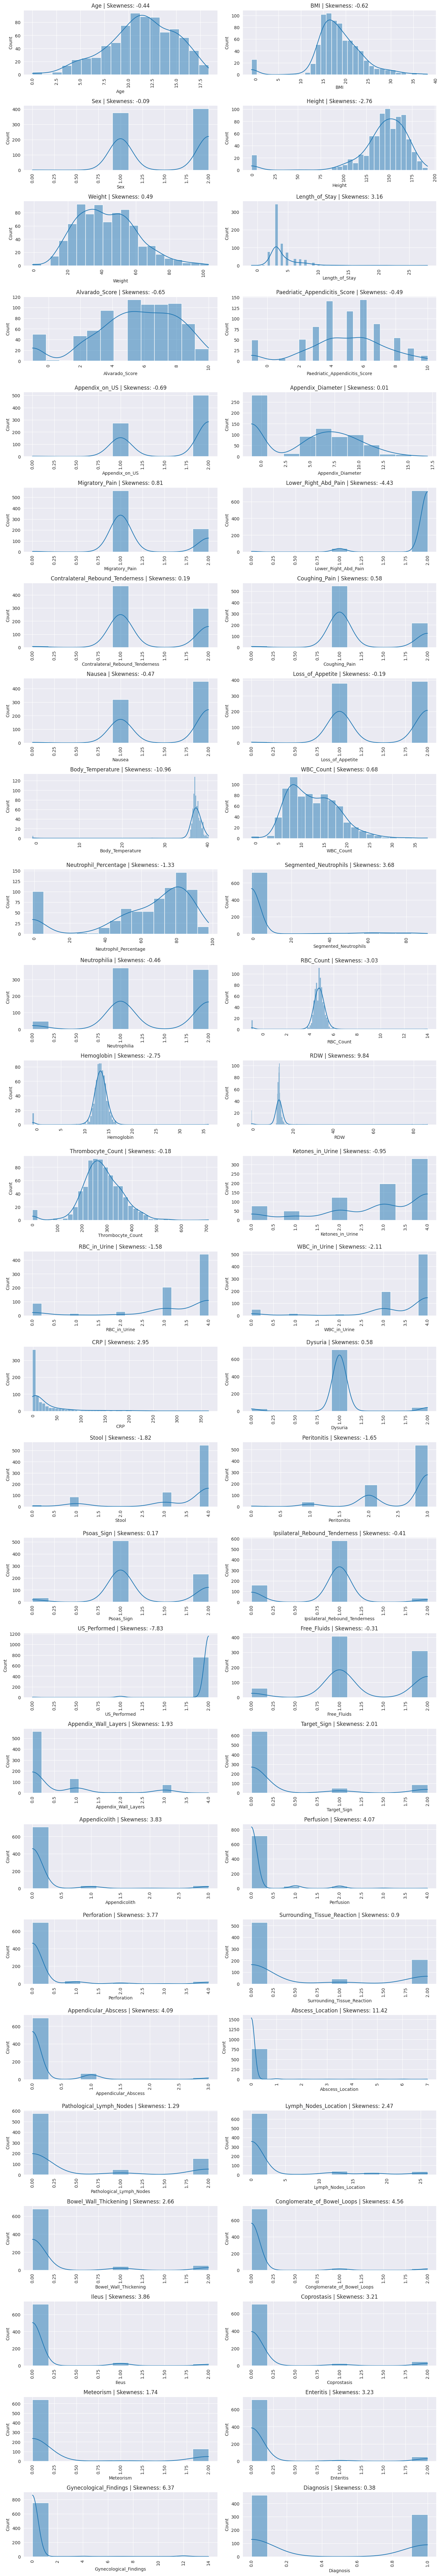

In [23]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
_columns = df_notnan.columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(_columns) * 3))
for idx, feature in enumerate(_columns, 1):
    plt.subplot(len(_columns), 2, idx)
    sns.histplot(df_notnan[feature], kde=True)
    plt.xticks(rotation=90)
    plt.title(f"{feature} | Skewness: {round(df_notnan[feature].skew(), 2)}")

# Adjust layout and show plots
plt.subplots_adjust(hspace = 1)
plt.tight_layout()
plt.show()

Многие количественные переменные имеют распределение, далекое от нормального. При этом есть разница на два порядка между значениями этих переменных. Необходимо стандартизировать или нормализовать данные, чтобы можно было использовать любую модель, включая нейронные сети. Целевая переменная имеет дисбаланс классов, которой необходимо устранить.

## Матрица корреляций

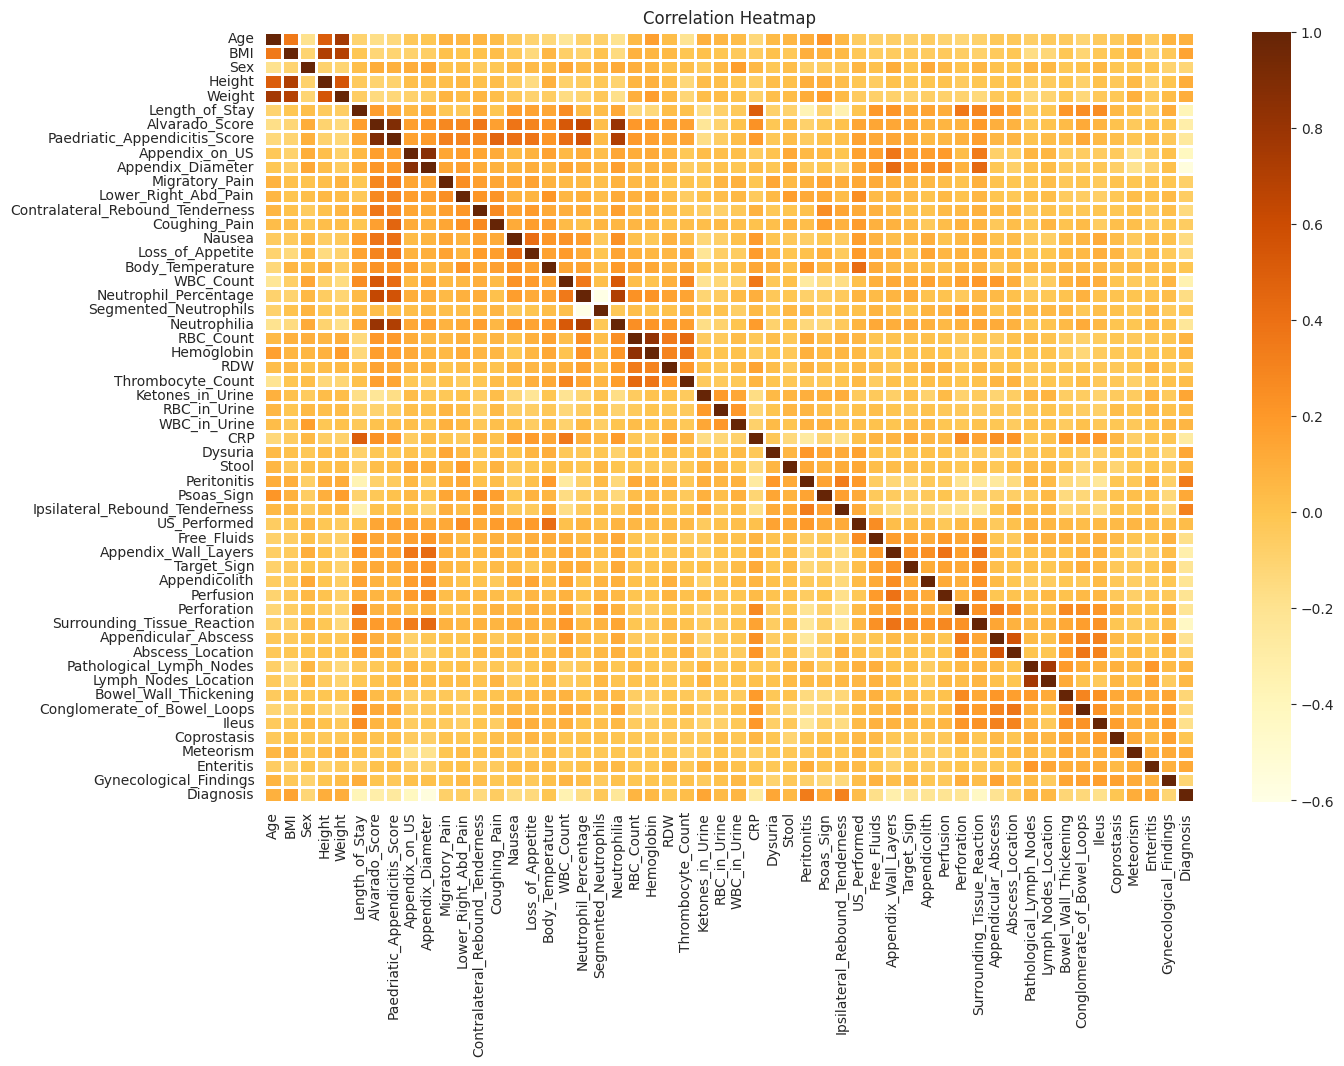

In [24]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_notnan.corr(), annot=False, cmap='YlOrBr', linewidths=1)

plt.title('Correlation Heatmap')
plt.show()

In [25]:
def correl(X_train, thresh):
    cor = X_train.corr()
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    all_cor = c1[c1.values != 1]
    return all_cor[abs(all_cor) > thresh]
correl(df_notnan, 0.9)

Series([], dtype: float64)

Несмотря на картинку матрицы корреляций, признаков, имеющих корреляцию, близкую к единице нет, поэтому оставим все признаки.

## Ящики с усами (BoxPlot)

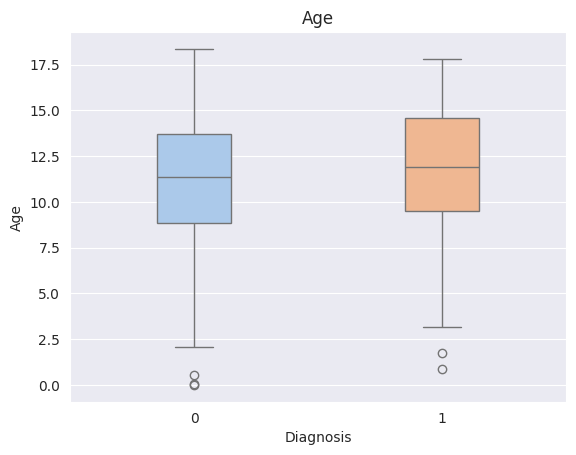

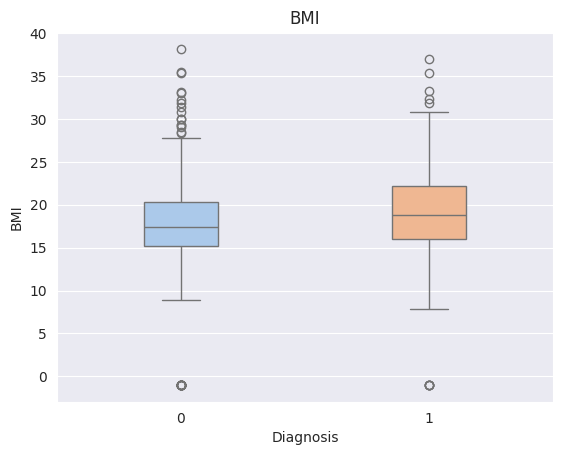

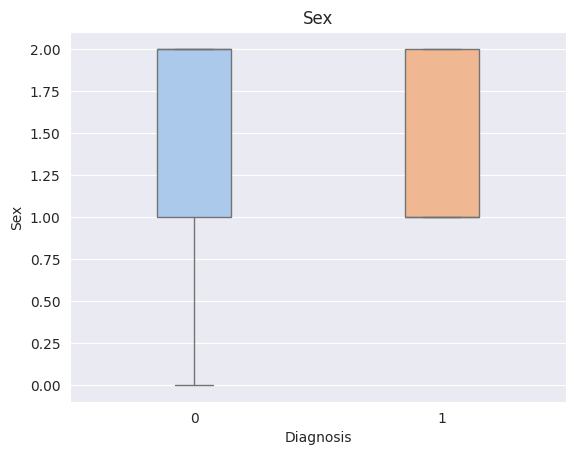

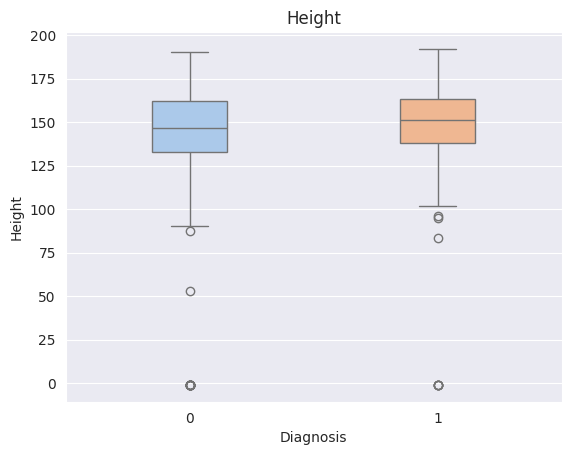

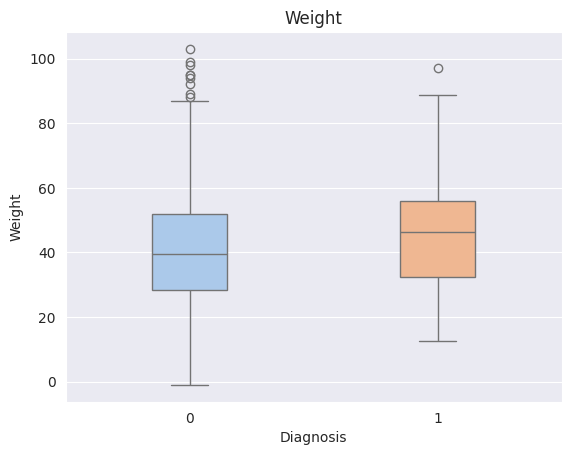

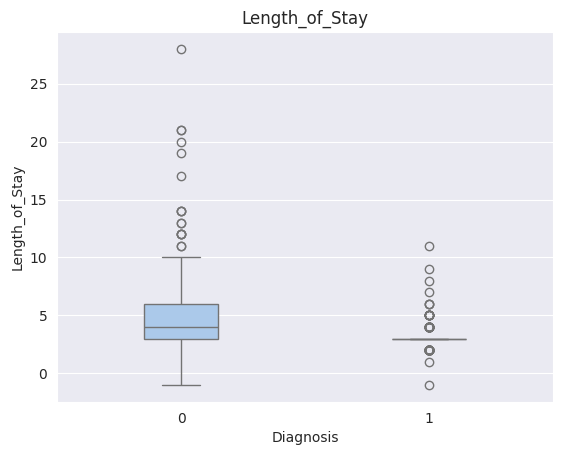

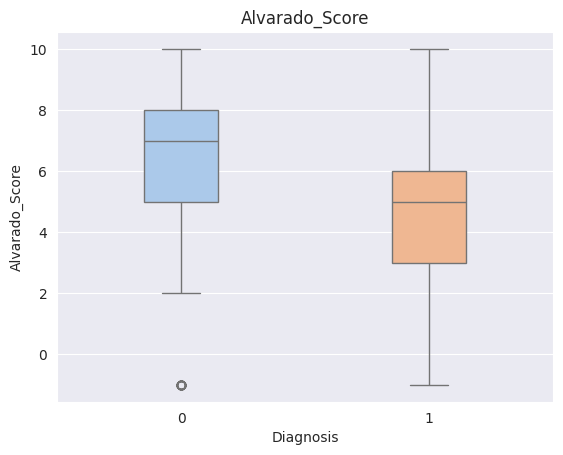

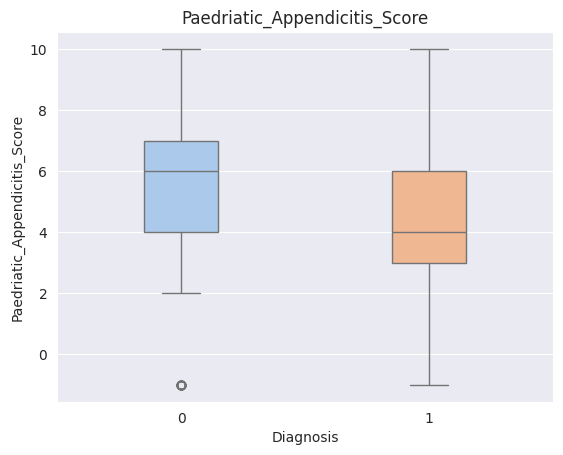

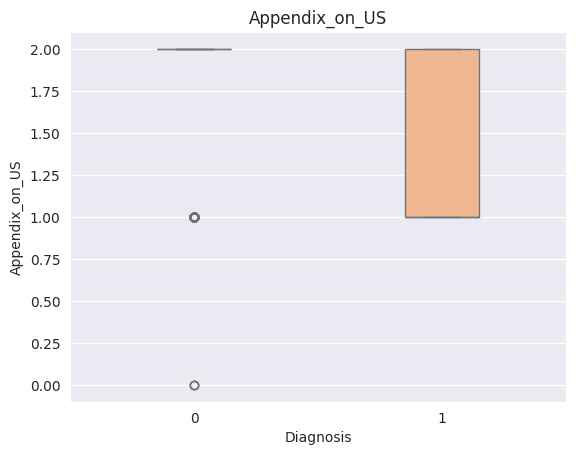

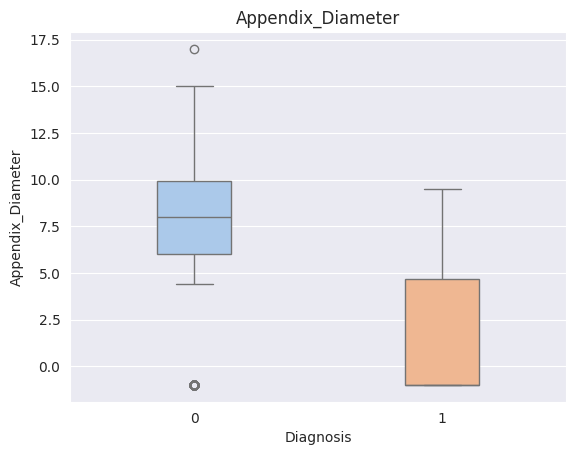

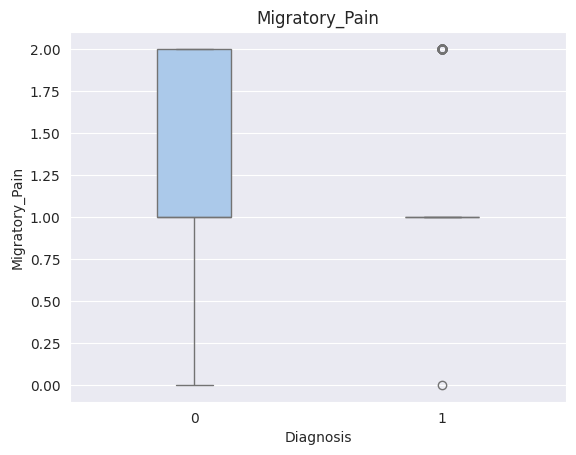

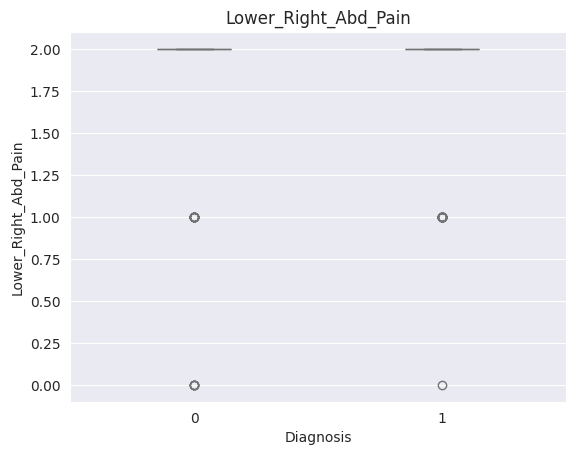

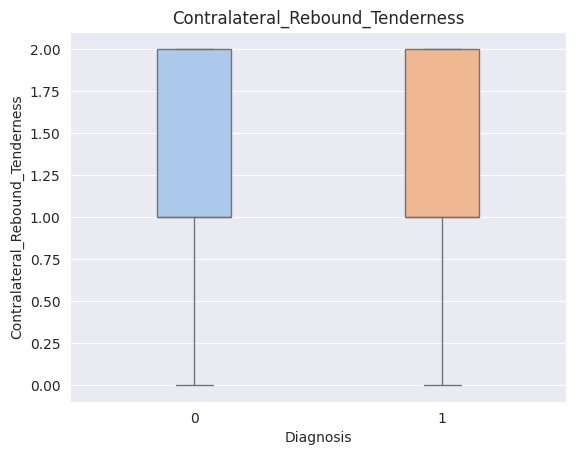

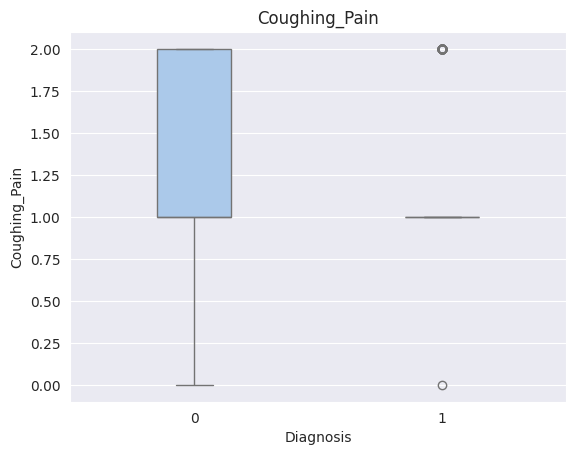

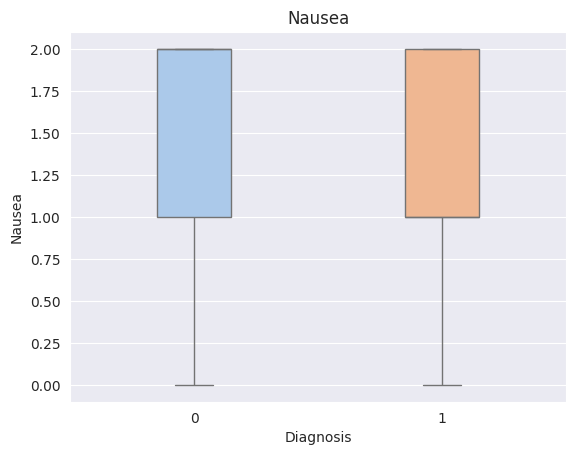

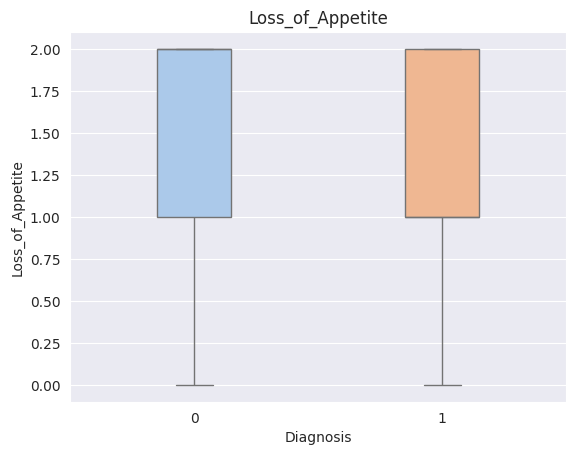

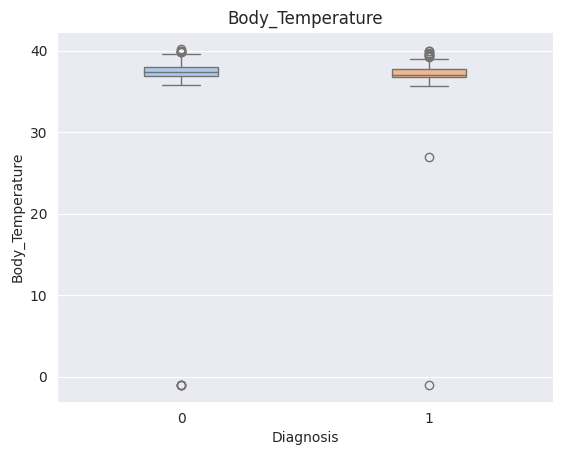

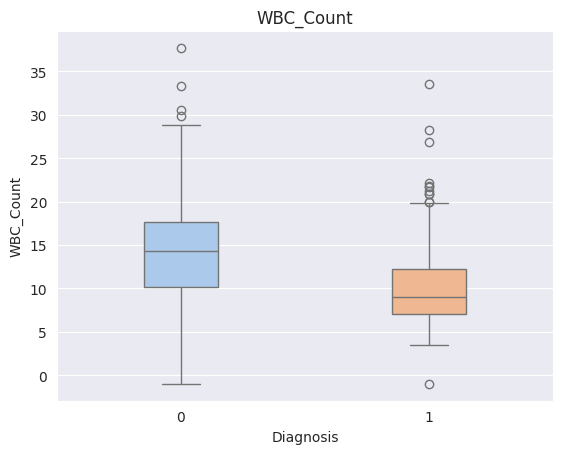

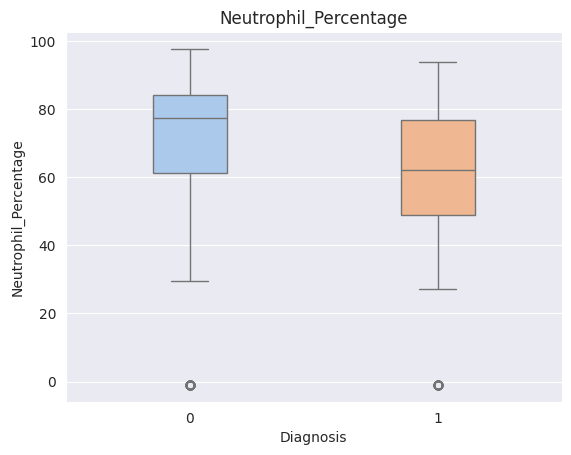

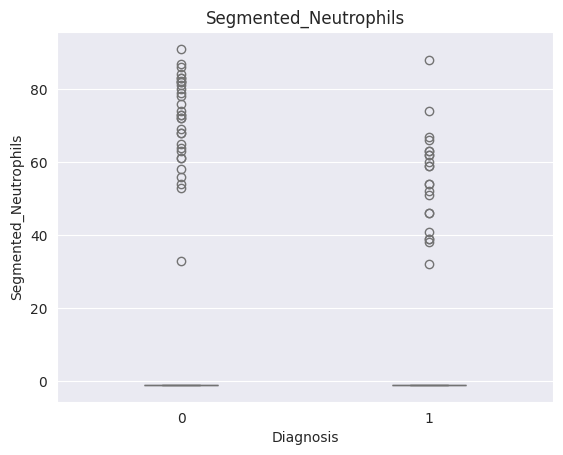

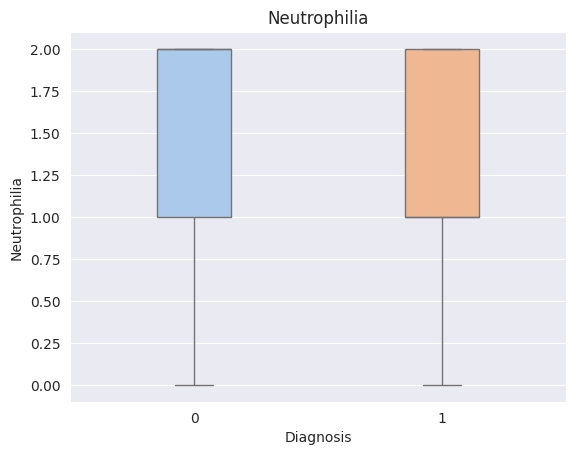

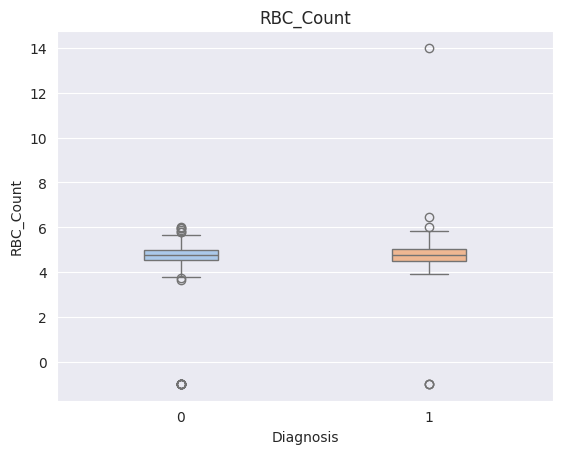

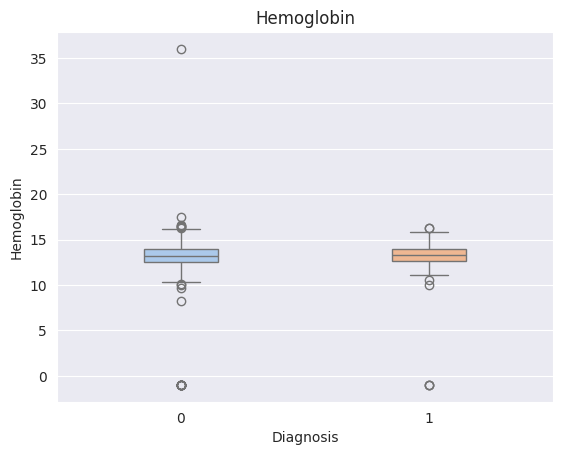

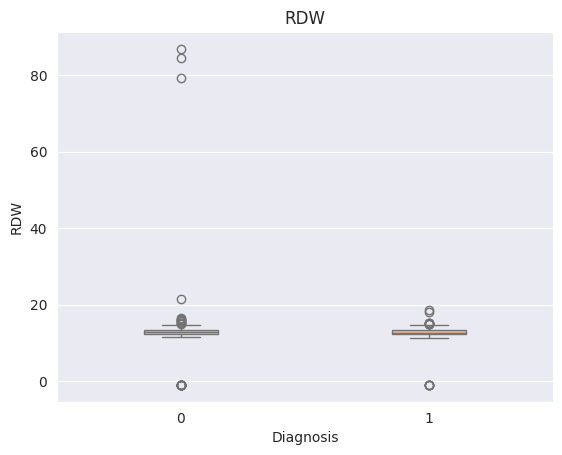

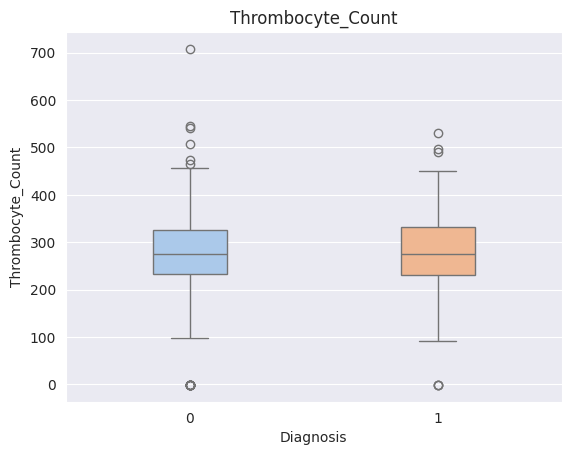

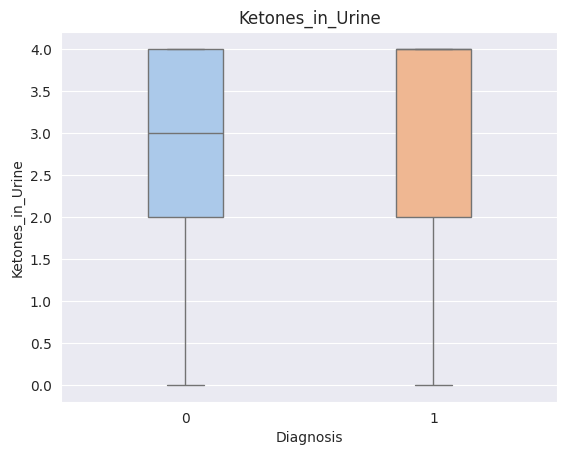

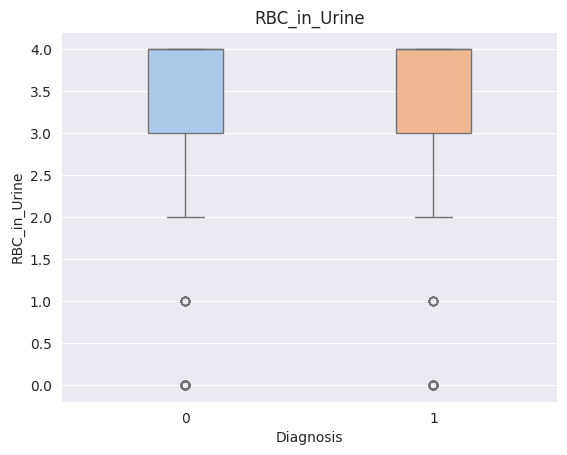

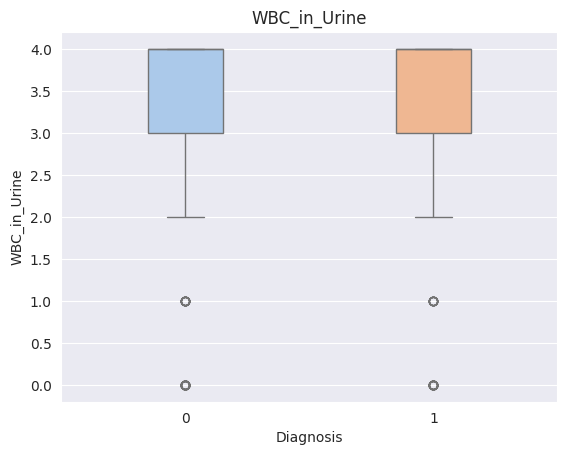

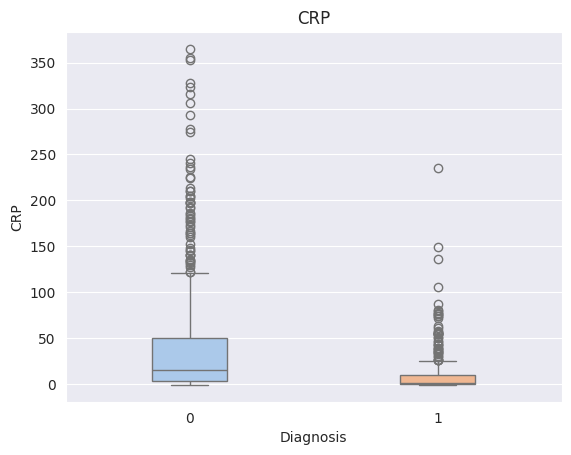

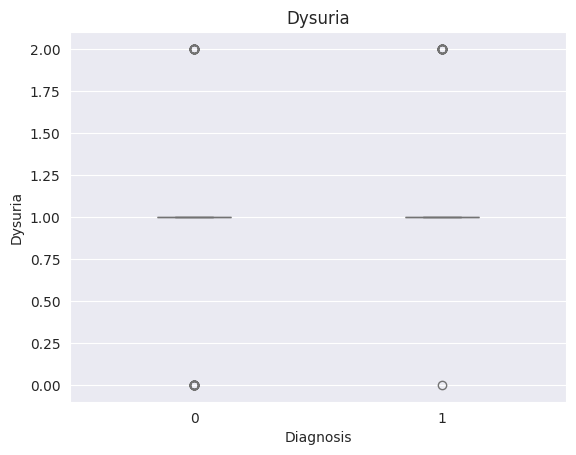

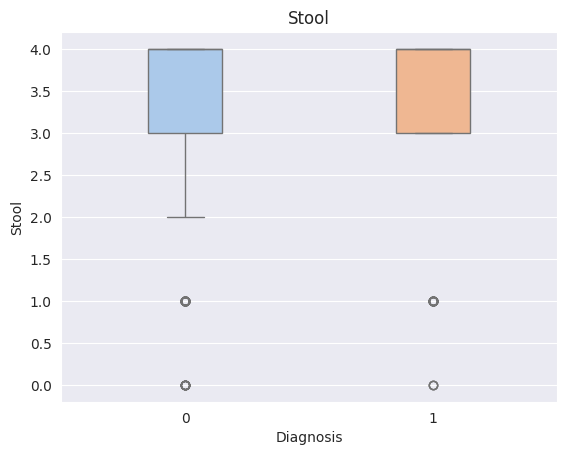

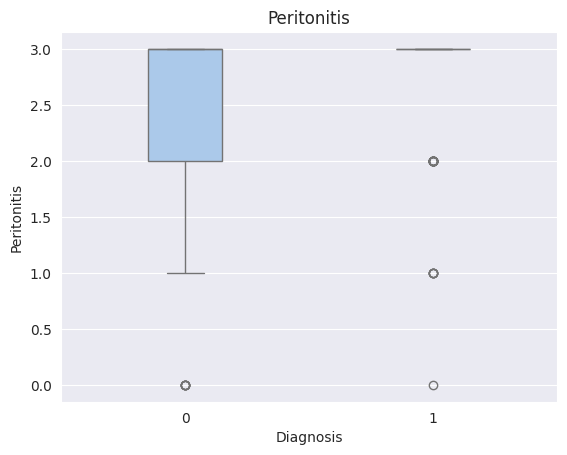

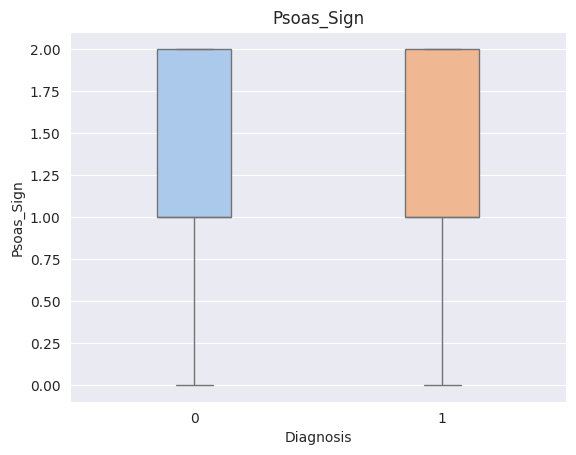

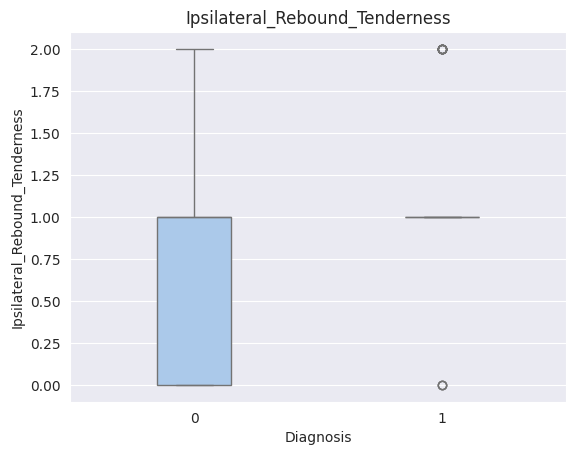

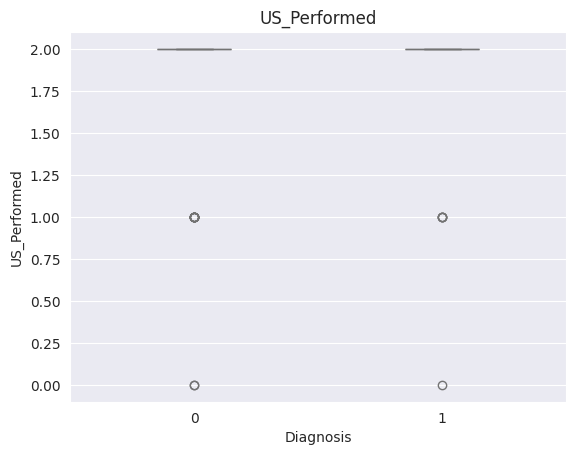

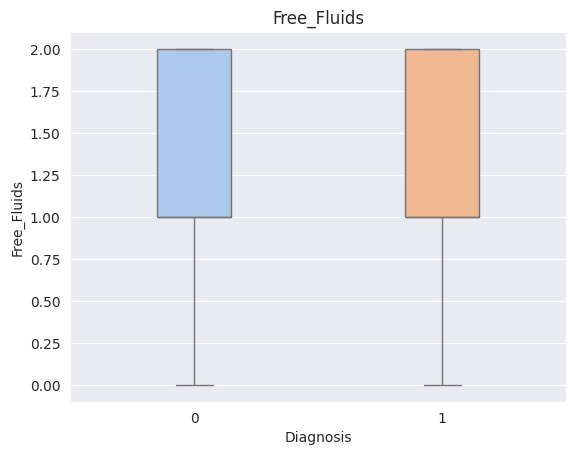

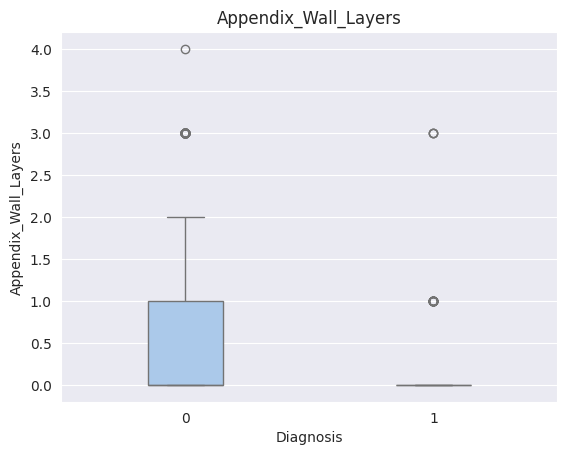

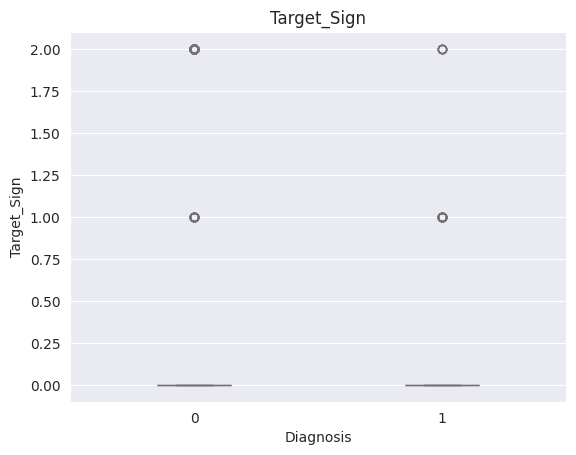

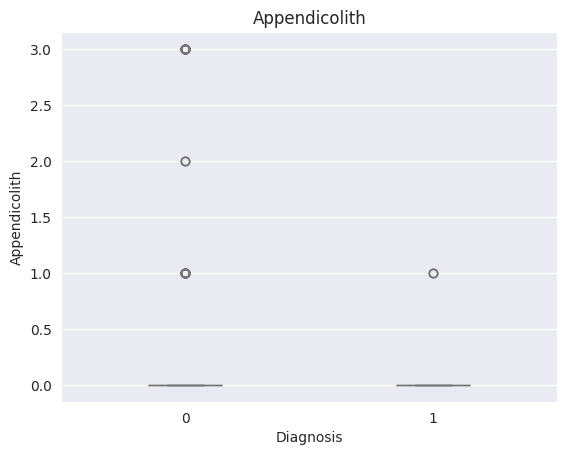

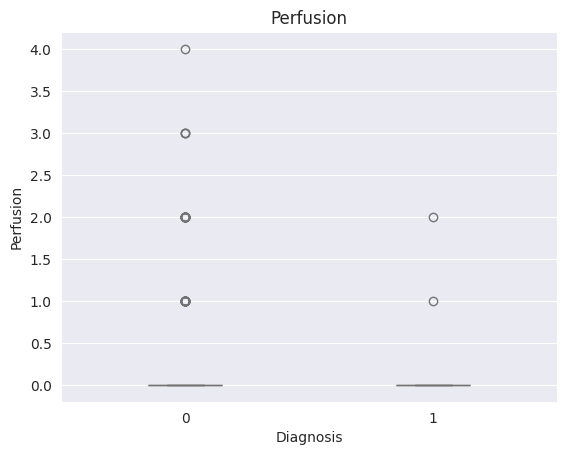

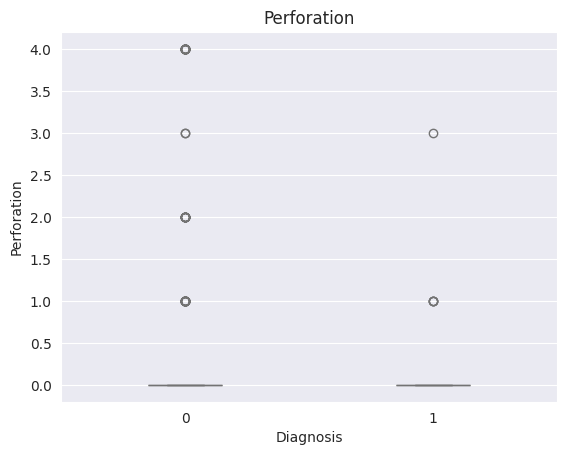

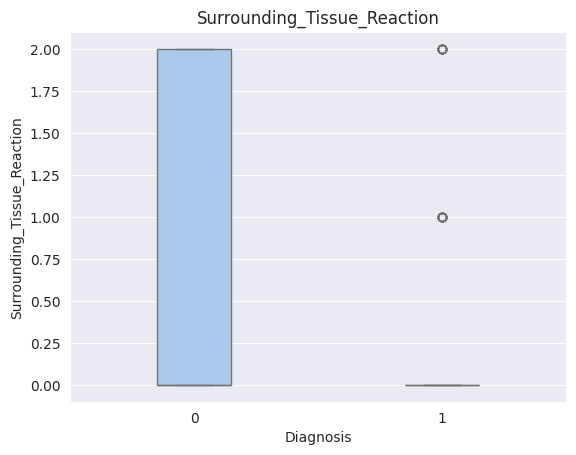

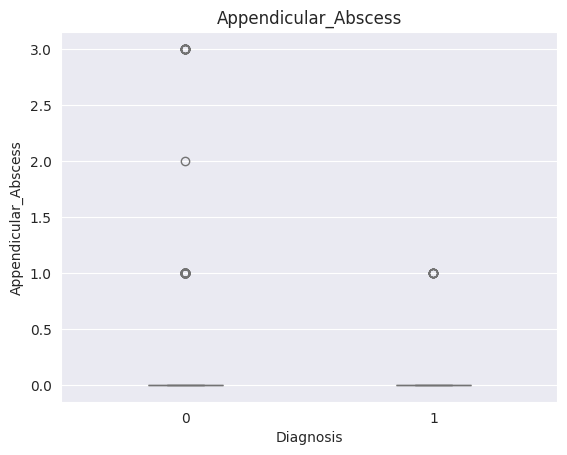

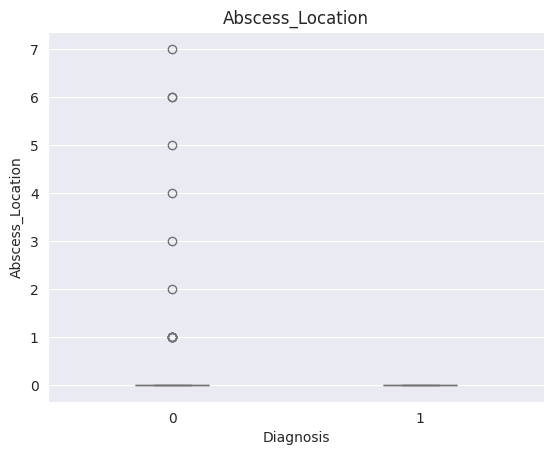

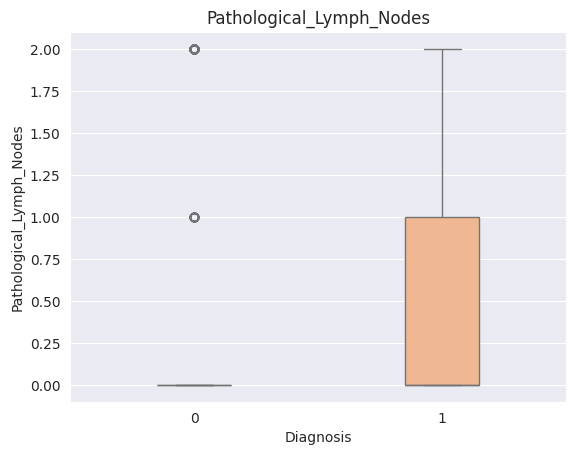

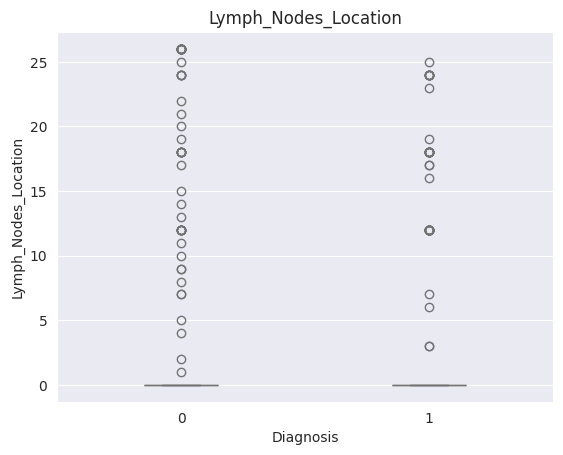

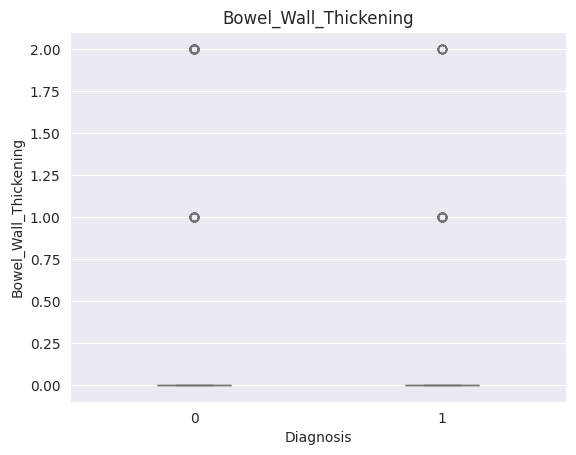

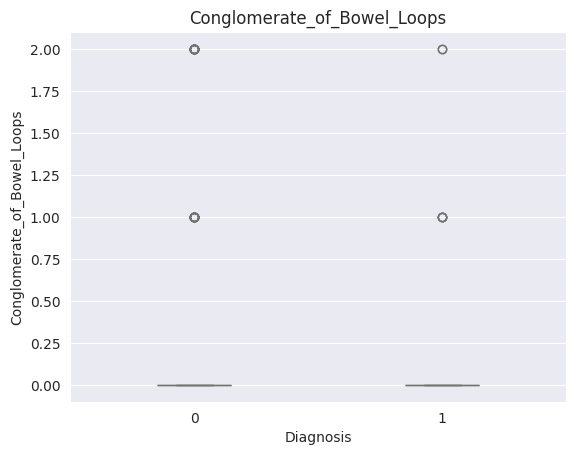

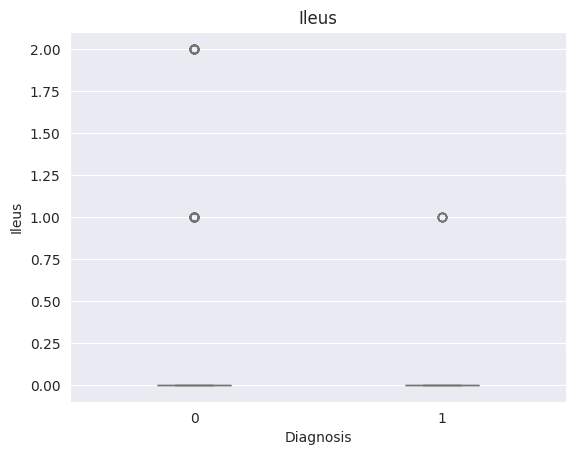

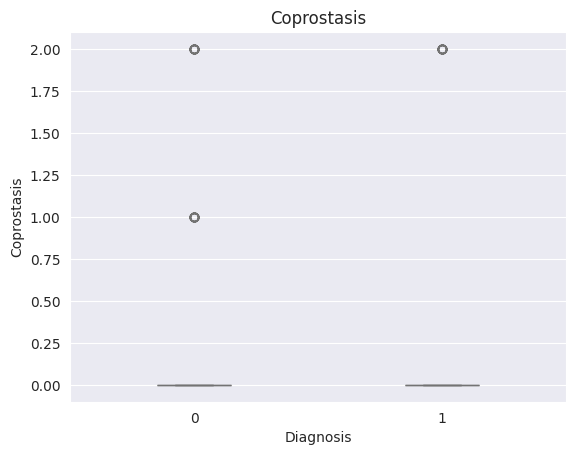

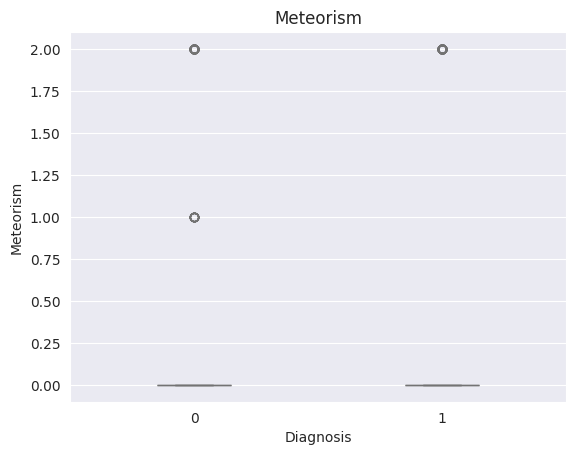

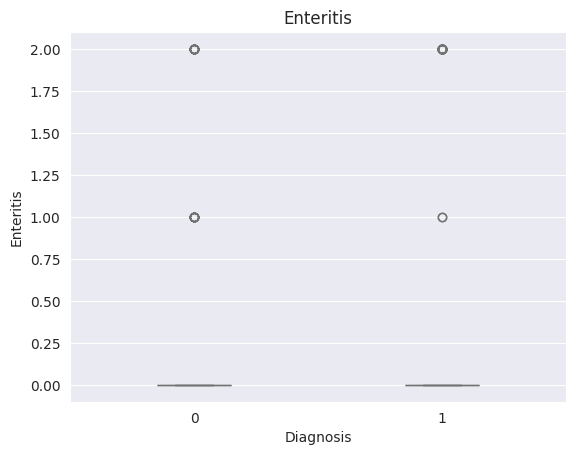

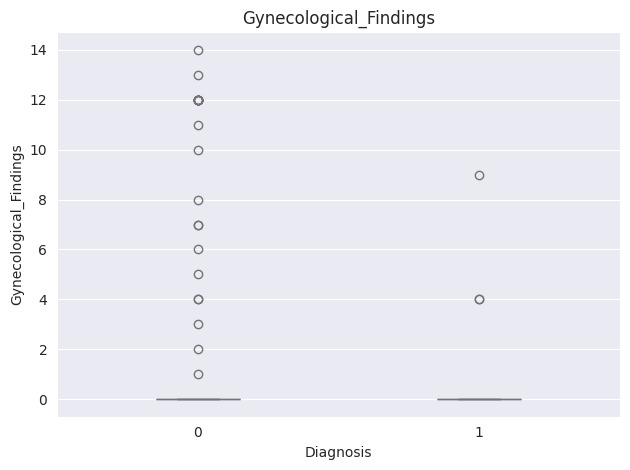

In [26]:
sns.set_style('darkgrid')
df_columns = df_notnan.drop(columns='Diagnosis')

for idx, feature in enumerate(df_columns, 1):
  plt.figure()
  g = sns.boxplot(x=df_notnan['Diagnosis'],
                  y=df_notnan[feature],
                  data=df_notnan,
                  palette='pastel',
                  width=0.3)
  plt.title(f'{feature}')

plt.tight_layout()
plt.show()

Есть выбросы. Сделаем стандартизацию с помощью adjdatatools.

## Разделение на Х и у

In [27]:
X = df_notnan.drop(columns='Diagnosis')
y = df_notnan['Diagnosis']

## Стандартизация данных с помощью adjdatatools

In [28]:
new_scaler = AdjustedScaler()
new_scaler.fit(X)
X_scaled = new_scaler.transform(X)

In [29]:
X_scaled

Age       BMI  Sex    Height    Weight  Length_of_Stay  \
0    0.078680 -0.038152 -0.5 -0.009775 -0.045055            0.00   
1    0.168782  0.597711  0.0 -0.019550  0.312088           -0.04   
2    0.171320  0.233150 -0.5  0.136852  0.229670            0.04   
3    0.312817  0.118694 -0.5  0.156403  0.163736            0.00   
4   -0.022843 -0.038152 -0.5  0.136852  0.042857            0.00   
..        ...       ...  ...       ...       ...             ...   
777  0.061548  0.315812 -0.5  0.171065  0.317582            0.04   
778  0.358503  0.111488 -0.5  0.087977  0.108791            0.12   
779  0.225254  0.089445 -0.5  0.029326  0.053846            0.04   
780 -0.269036 -0.148368  0.0 -0.192571 -0.189011            0.08   
781  0.004442  0.015685  0.0 -0.024438 -0.023077            0.04   

     Alvarado_Score  Paedriatic_Appendicitis_Score  Appendix_on_US  \
0         -0.181818                         -0.250             0.0   
1         -0.090909                         -0.125            -0.5   
2         -0.090909                         -0.250            -0.5   
3          0.090909                          0.125            -0.5   
4         -0.090909                          0.125             0.0   
..              ...                            ...             ...   
777        0.181818                          0.250             0.0   
778       -0.090909                         -0.250            -0.5   
779       -0.090909                         -0.250            -0.5   
780        0.272727                          0.375             0.0   
781       -0.363636                         -0.375             0.0   

     Appendix_Diameter  ...  Abscess_Location  Pathological_Lymph_Nodes  \
0             0.120968  ...          0.000000                       1.0   
1            -0.532258  ...          0.000000                       0.0   
2            -0.532258  ...          0.000000                       0.0   
3            -0.532258  ...          0.000000                       1.0   
4             0.112903  ...          0.000000                       1.0   
..                 ...  ...               ...                       ...   
777           0.153226  ...          0.000000                       0.0   
778          -0.532258  ...          0.142857                       0.0   
779          -0.532258  ...          0.000000                       0.0   
780           0.677419  ...          0.000000                       0.5   
781           0.193548  ...          0.000000                       1.0   

     Lymph_Nodes_Location  Bowel_Wall_Thickening  Conglomerate_of_Bowel_Loops  \
0                1.263158                    0.0                          0.0   
1                0.000000                    0.0                          0.0   
2                0.000000                    0.0                          0.0   
3                1.263158                    0.0                          0.0   
4                1.263158                    0.0                          0.0   
..                    ...                    ...                          ...   
777              0.000000                    0.0                          0.0   
778              0.000000                    1.0                          2.0   
779              0.000000                    0.0                          0.0   
780              0.000000                    1.0                          0.0   
781              1.368421                    0.0                          0.0   

     Ileus  Coprostasis  Meteorism  Enteritis  Gynecological_Findings  
0      0.0          0.0        0.0        0.0                     0.0  
1      0.0          0.0        1.0        0.0                     0.0  
2      0.0          0.0        1.0        1.0                     0.0  
3      0.0          0.0        0.0        1.0                     0.0  
4      0.0          0.0        0.0        1.0                     0.0  
..     ...          ...        ...        ... 

## Балансировка классов с помощью SMOTE

In [30]:
oversample = SMOTE()
X_scaled, y = oversample.fit_resample(X_scaled, y)

In [31]:
print(sum(y == 0))
print(sum(y == 1))

463
463


## Разделение на тренировочный и тестовый датасеты

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    stratify=y,
                                                    train_size=0.75,
                                                    random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (694, 53)
X_test shape: (232, 53)


# Подбор модели

## Функция для визуализации результатов

In [33]:
def run_classifier(clf, param_grid, title):
    # -----------------------------------------------------
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf,
                            param_distributions = param_grid,
                            n_iter = n_iter_search,
                            cv = cv,
                            scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    gs.fit(X_train, y_train)
    print("The best parameters are %s" % (gs.best_params_))
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred)*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred)*100))
    # -----------------------------------------------------
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(21, 7))
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    fig.tight_layout()
    # -----------------------------------------------------
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax2.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
    ax2.plot([0, 1], [0, 1],
             linestyle = '--',
             color = (0.6, 0.6, 0.6),
             label = 'Random guessing')
    ax2.plot([0, 0, 1], [0, 1, 1],
             linestyle = ':',
             color = 'black',
             label = 'Perfect performance')
    ax2.set_xlim([-0.05, 1.05])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate (FPR)')
    ax2.set_ylabel('True Positive Rate (TPR)')
    ax2.set_title('Receiver Operator Characteristic (ROC) Curve')
    ax2.legend(loc = "lower right")
    fig.tight_layout()

## Logistic Regression

The best parameters are {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'C': 78.47599703514607}
Accuracy score: 89.22%
Precision score: 88.89%
Recall score: 89.66%


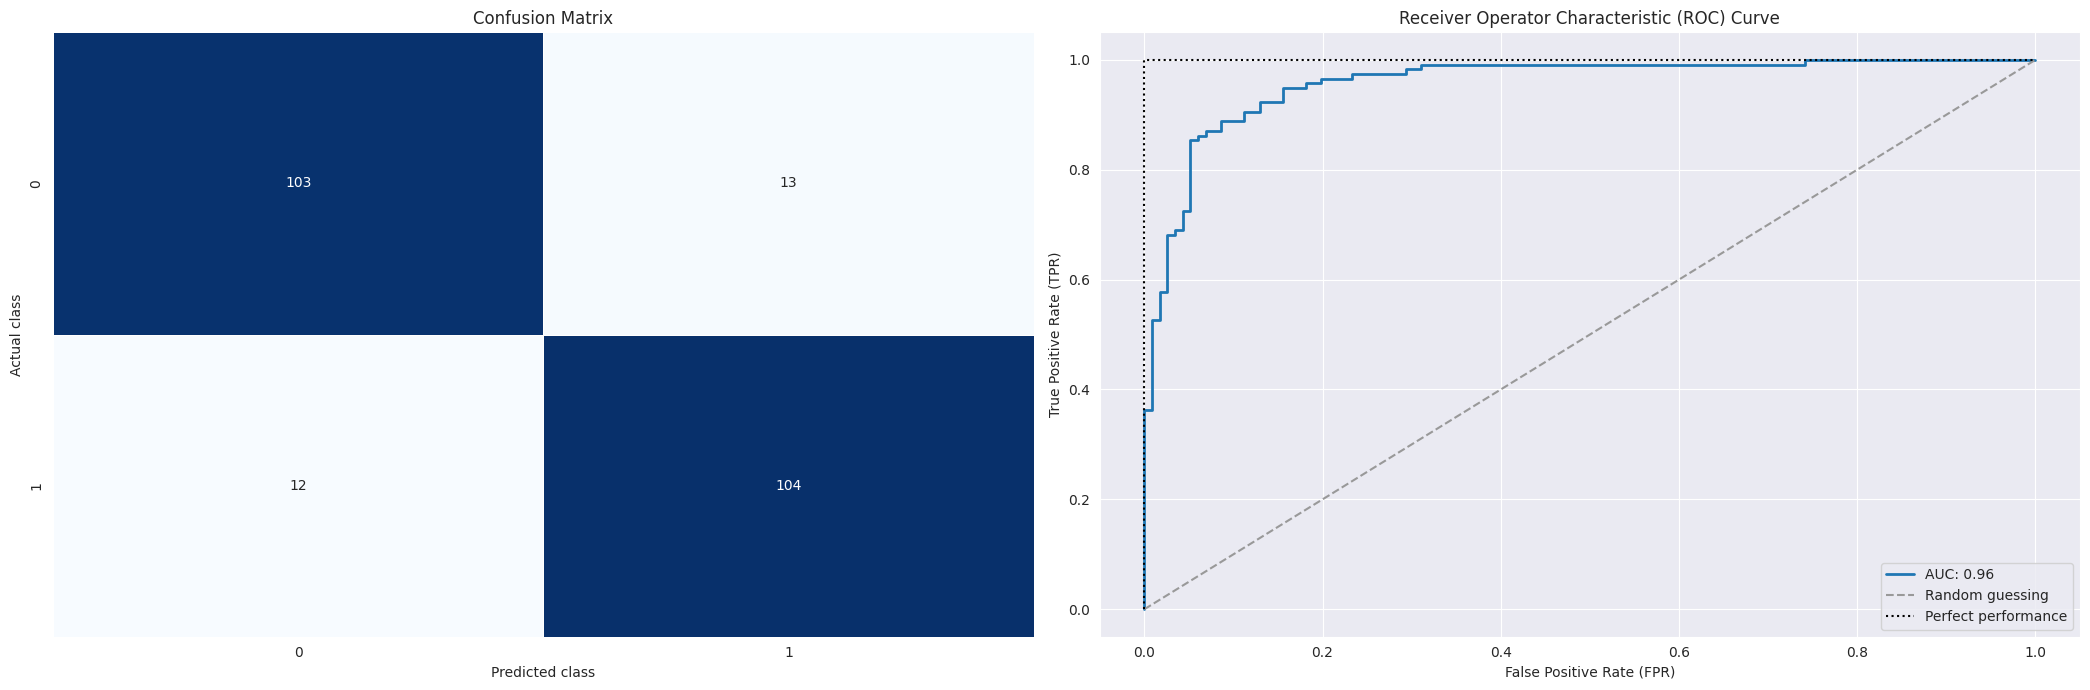

In [34]:
lr_model = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(-4, 4, 20),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter' : [50, 100, 500, 1000]}

run_classifier(lr_model, param_grid, 'Logistic Regression')

### Функция потерь

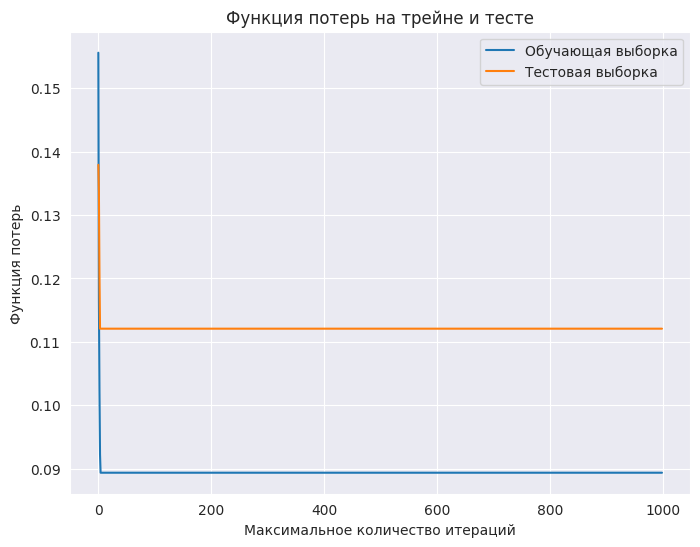

In [35]:
error_rate_train = []
error_rate_test = []
max_iter = 1000

lr_best_model = LogisticRegression(penalty='l2',
                                   C=0.615848211066026,
                                   solver='newton-cg')

for i in range(1, max_iter + 1):
  lr_best_model.set_params(max_iter=i)
  lr_best_model.fit(X_train, y_train)
  train_loss = 1 - lr_best_model.score(X_train, y_train)
  error_rate_train.append(train_loss)
  y_pred = lr_best_model.predict(X_test)
  test_loss = 1 - accuracy_score(y_pred, y_test)
  error_rate_test.append(test_loss)

plt.figure(figsize=(8, 6))
plt.plot(error_rate_train, label='Обучающая выборка')
plt.plot(error_rate_test, label='Тестовая выборка')
plt.xlabel('Максимальное количество итераций')
plt.ylabel('Функция потерь')
plt.title('Функция потерь на трейне и тесте')
plt.legend()
plt.show()

Результат не самый идеальный, но достаточно хороший.

## Random Forest

The best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': False}
Accuracy score: 97.84%
Precision score: 97.44%
Recall score: 98.28%


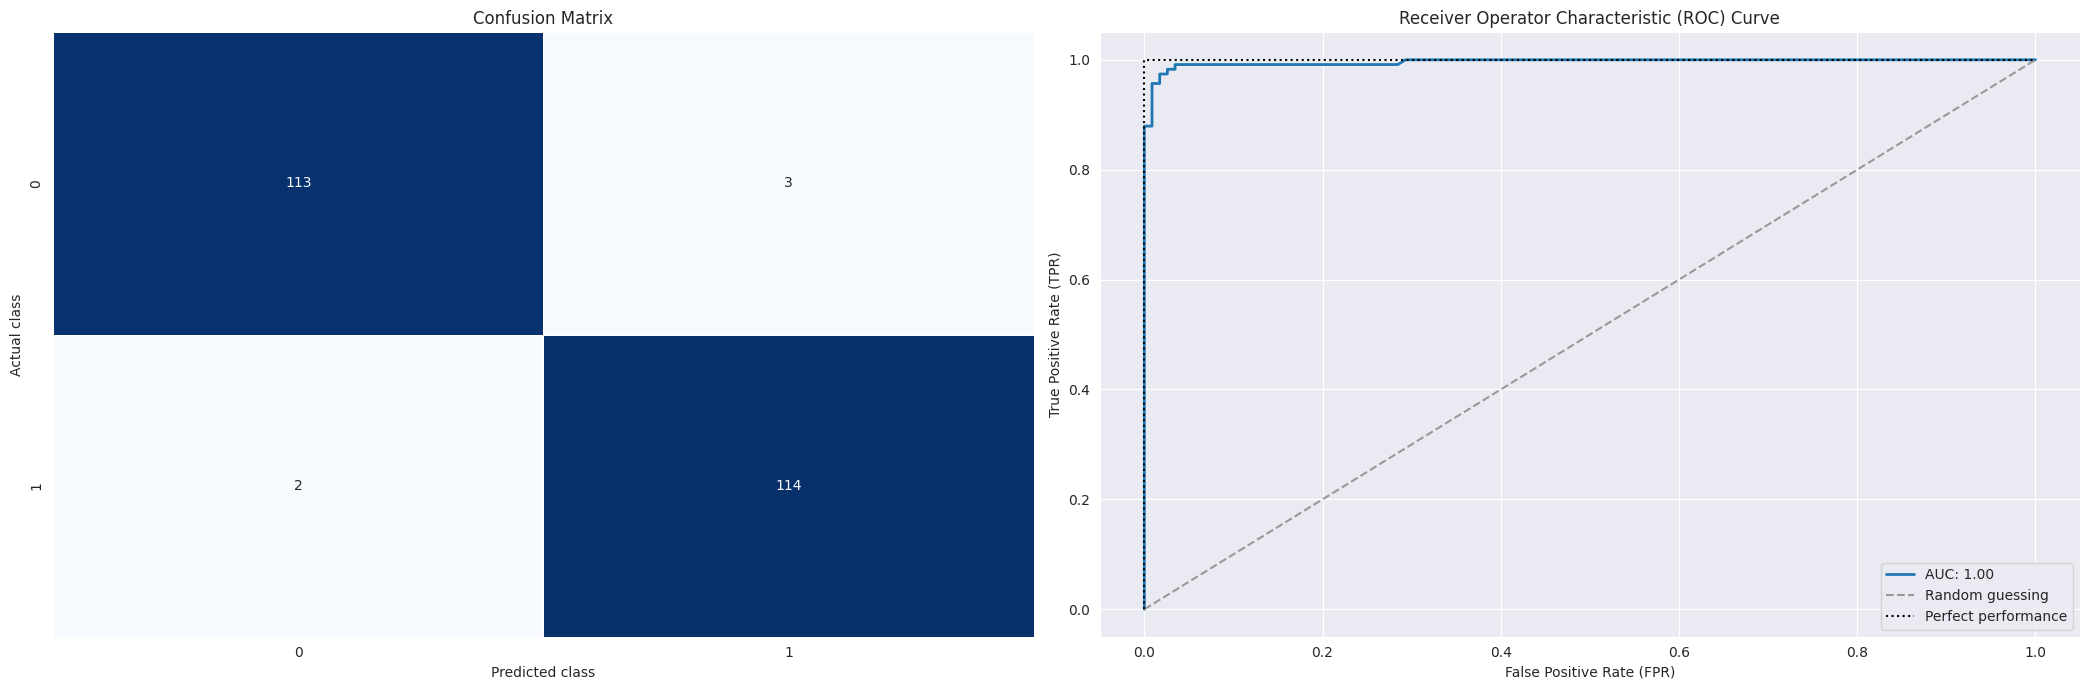

In [36]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

run_classifier(rf_model, param_grid, 'Random Forest')

### Функция потерь

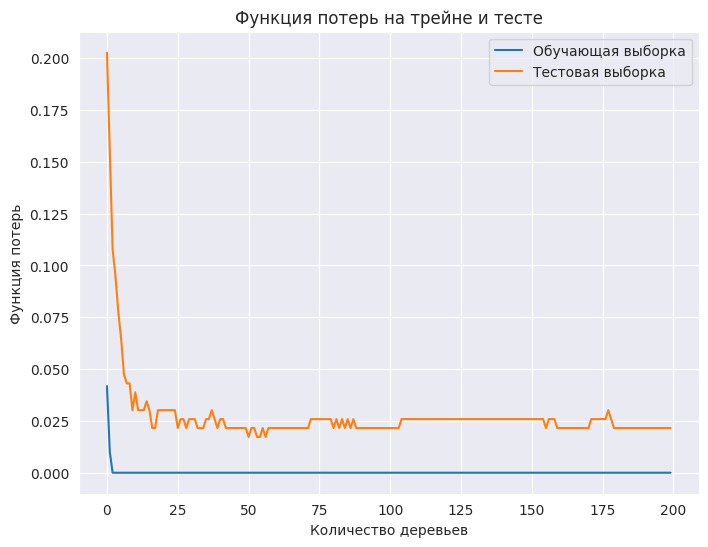

In [37]:
error_rate_train = []
error_rate_test = []
n_estimators = 200

rf_best_model = RandomForestClassifier(min_samples_split=2,
                                       min_samples_leaf=2,
                                       max_features='sqrt',
                                       max_depth=20,
                                       criterion='gini',
                                       bootstrap=False,
                                       random_state=42)

for i in range(1, n_estimators + 1):
  rf_best_model.set_params(n_estimators=i)
  rf_best_model.fit(X_train, y_train)
  train_loss = 1 - rf_best_model.score(X_train, y_train)
  error_rate_train.append(train_loss)
  y_pred = rf_best_model.predict(X_test)
  test_loss = 1 - accuracy_score(y_pred, y_test)
  error_rate_test.append(test_loss)

plt.figure(figsize=(8, 6))
plt.plot(error_rate_train, label='Обучающая выборка')
plt.plot(error_rate_test, label='Тестовая выборка')
plt.xlabel('Количество деревьев')
plt.ylabel('Функция потерь')
plt.title('Функция потерь на трейне и тесте')
plt.legend()
plt.show()

Случайный лес показал результаты лучше, чем логистическая регрессия, допустив всего пять ошибок.

## Keras

In [38]:
X_train.shape, X_test.shape

((694, 53), (232, 53))

### Подбор количества нейронов скрытого слоя:

In [40]:
%%time
results_num = pd.DataFrame()
n_nums = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []


for n_num in list(map(lambda x: 2**x, range(1, 10))):

    n_nums.append(n_num)

    model = Sequential([
        Input(shape=(53,)),
        Dense(n_num, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)


results_num['n_num'] = n_nums
results_num['train_loss'] = train_losses
results_num['test_loss'] = test_losses
results_num['train_metric'] = train_metrics
results_num['test_metric'] = test_metrics
results_num.sort_values(by='test_metric', ascending=False)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4762 - loss: 0.7742 - val_accuracy: 0.3621 - val_loss: 0.8168
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4405 - loss: 0.7722 - val_accuracy: 0.3578 - val_loss: 0.8032
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4289 - loss: 0.7718 - val_accuracy: 0.3405 - val_loss: 0.7919
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4094 - loss: 0.7757 - val_accuracy: 0.3707 - val_loss: 0.7821
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4218 - loss: 0.7541 - val_accuracy: 0.3534 - val_loss: 0.7735
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4091 - loss: 0.7511 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3294 - loss: 0.7855 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4764 - loss: 0.8054 - val_accuracy: 0.4914 - val_loss: 0.8320
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5082 - loss: 0.7562 - val_accuracy: 0.4957 - val_loss: 0.8196
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4997 - loss: 0.7716 - val_accuracy: 0.5000 - val_loss: 0.8085
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4952 - loss: 0.7670 - val_accuracy: 0.4957 - val_loss: 0.7988
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4870 - loss: 0.7600 - val_accuracy: 0.5129 - val_loss: 0.7902
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4959 - loss: 0.7395 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4708 - loss: 0.7965 


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4785 - loss: 0.7159 - val_accuracy: 0.5474 - val_loss: 0.6827
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4842 - loss: 0.7095 - val_accuracy: 0.5431 - val_loss: 0.6788
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5061 - loss: 0.7088 - val_accuracy: 0.5388 - val_loss: 0.6752
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4845 - loss: 0.7061 - val_accuracy: 0.5474 - val_loss: 0.6718
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4747 - loss: 0.7055 - val_accuracy: 0.5517 - val_loss: 0.6686
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5006 - loss: 0.6981 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5837 - loss: 0.6543 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7522 - loss: 0.6388 - val_accuracy: 0.7241 - val_loss: 0.6374
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7401 - loss: 0.6302 - val_accuracy: 0.7284 - val_loss: 0.6338
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7414 - loss: 0.6315 - val_accuracy: 0.7328 - val_loss: 0.6303
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7495 - loss: 0.6272 - val_accuracy: 0.7414 - val_loss: 0.6267
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.6238 - val_accuracy: 0.7457 - val_loss: 0.6232
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.6204 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7410 - loss: 0.6237 


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,761 (6.88 KB)

 Trainable params: 1,761 (6.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5603 - loss: 0.6909 - val_accuracy: 0.5647 - val_loss: 0.6669
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5924 - loss: 0.6755 - val_accuracy: 0.5819 - val_loss: 0.6622
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5856 - loss: 0.6845 - val_accuracy: 0.6078 - val_loss: 0.6578
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5901 - loss: 0.6793 - val_accuracy: 0.6164 - val_loss: 0.6537
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6493 - loss: 0.6574 - val_accuracy: 0.6250 - val_loss: 0.6498
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6087 - loss: 0.6715 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6536 - loss: 0.6390 


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5423 - loss: 0.6778 - val_accuracy: 0.6078 - val_loss: 0.6651
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5394 - loss: 0.6687 - val_accuracy: 0.6336 - val_loss: 0.6584
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 0.6625 - val_accuracy: 0.6810 - val_loss: 0.6519
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5549 - loss: 0.6599 - val_accuracy: 0.7026 - val_loss: 0.6457
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5790 - loss: 0.6480 - val_accuracy: 0.7112 - val_loss: 0.6397
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6056 - loss: 0.6468 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.6311 


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │           6,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,041 (27.50 KB)

 Trainable params: 7,041 (27.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5508 - loss: 0.6808 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5680 - loss: 0.6720 - val_accuracy: 0.5129 - val_loss: 0.6833
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6314 - loss: 0.6597 - val_accuracy: 0.5345 - val_loss: 0.6760
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6439 - loss: 0.6554 - val_accuracy: 0.5517 - val_loss: 0.6690
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6523 - loss: 0.6509 - val_accuracy: 0.5690 - val_loss: 0.6622
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6821 - loss: 0.6429 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5963 - loss: 0.6519 


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5515 - loss: 0.6912 - val_accuracy: 0.6034 - val_loss: 0.6734
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6058 - loss: 0.6763 - val_accuracy: 0.6207 - val_loss: 0.6636
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6211 - loss: 0.6666 - val_accuracy: 0.6466 - val_loss: 0.6547
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6225 - loss: 0.6610 - val_accuracy: 0.6595 - val_loss: 0.6464
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6643 - loss: 0.6466 - val_accuracy: 0.6853 - val_loss: 0.6387
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.6486 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 0.6379 


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 512)                 │          27,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,161 (110.00 KB)

 Trainable params: 28,161 (110.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5306 - loss: 0.7074 - val_accuracy: 0.5302 - val_loss: 0.7059
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5665 - loss: 0.6942 - val_accuracy: 0.5431 - val_loss: 0.6947
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5814 - loss: 0.6864 - val_accuracy: 0.5819 - val_loss: 0.6846
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6308 - loss: 0.6726 - val_accuracy: 0.6250 - val_loss: 0.6754
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6611 - loss: 0.6631 - val_accuracy: 0.6595 - val_loss: 0.6669
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - loss: 0.6596 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6555 - loss: 0.6688 
CPU times: user 12.6 s, sys: 355 ms, total: 13 s
Wall time: 14.5 s


n_num  train_loss  test_loss  train_metric  test_metric
3     16    0.620071   0.623153      0.762248     0.745690
5     64    0.643339   0.639665      0.621037     0.711207
7    256    0.644084   0.638696      0.671470     0.685345
8    512    0.658128   0.666943      0.691643     0.659483
4     32    0.667776   0.649766      0.615274     0.625000
6    128    0.645888   0.662227      0.672911     0.568965
2      8    0.696095   0.668639      0.501441     0.551724
1      4    0.747512   0.790164      0.504323     0.512931
0      2    0.746324   0.773526      0.432277     0.353448

#### Функция потерь + Accuracy

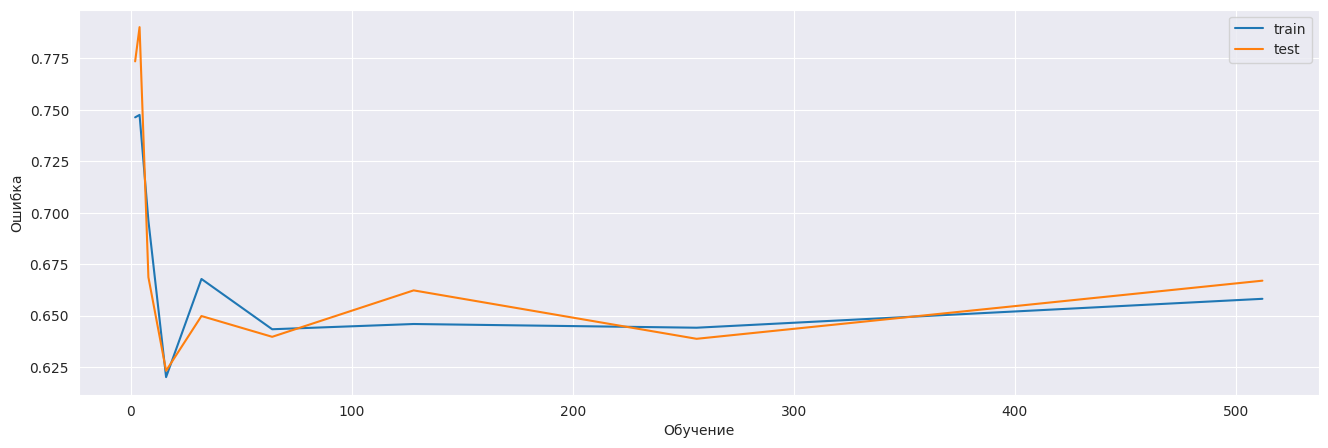

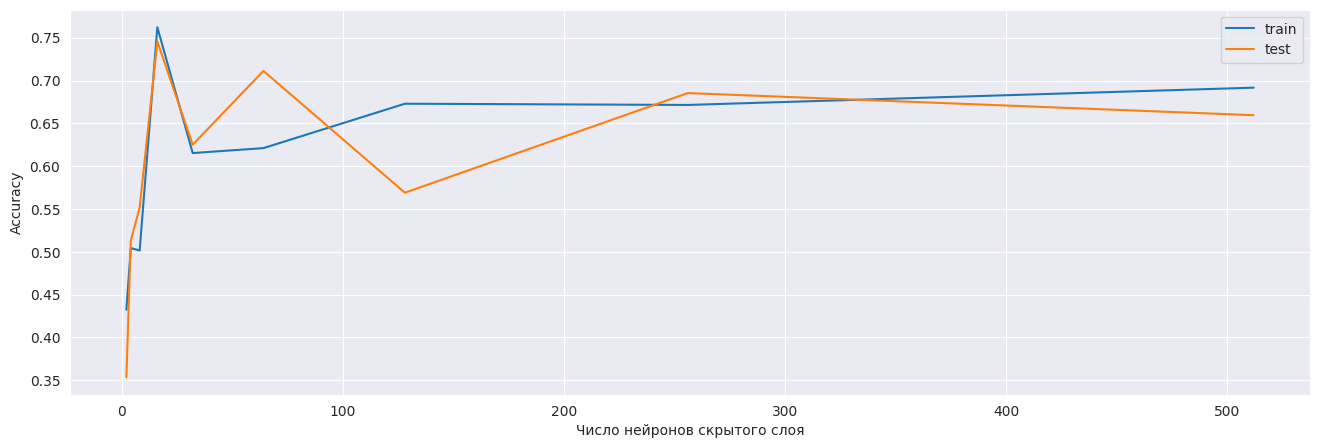

In [41]:
plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'], results_num['train_loss'], label='train')
plt.plot(results_num['n_num'], results_num['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'], results_num['train_metric'], label='train')
plt.plot(results_num['n_num'], results_num['test_metric'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Видно, что ошибка была низкой на старте, а при увеличении количества нейронов, она начала расти. Лучшие результаты и по ошибке, и по оценке на тесте при 16 нейронах: accuracy: 0.7410 - loss: 0.6237. При 64 и 256 - результаты чуть хуже.

## Подбор числа скрытых слоев:

###При 16 нейронах в слое

In [47]:
%%time
results_layers = pd.DataFrame()
n_nums = []
n_layers = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []

k_dict = {1:16, 2:16, 3:16, 5:16, 10:16}
for n in [1, 2, 3, 5, 10]:

    k = k_dict[n]
    n_nums.append(k)
    n_layers.append(n)

    model = Sequential()
    model.add(Input(shape=(53,)))
    for i in range(n):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)


results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                     │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5523 - loss: 0.6773 - val_accuracy: 0.5474 - val_loss: 0.6814
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6096 - loss: 0.6665 - val_accuracy: 0.5733 - val_loss: 0.6781
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5915 - loss: 0.6694 - val_accuracy: 0.5819 - val_loss: 0.6749
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6085 - loss: 0.6664 - val_accuracy: 0.5862 - val_loss: 0.6716
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6088 - loss: 0.6625 - val_accuracy: 0.5905 - val_loss: 0.6684
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.6603 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5940 - loss: 0.6730 


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_83 (Dense)                     │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4598 - loss: 0.6909 - val_accuracy: 0.4310 - val_loss: 0.7037
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4673 - loss: 0.6878 - val_accuracy: 0.4267 - val_loss: 0.7010
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4386 - loss: 0.6917 - val_accuracy: 0.4310 - val_loss: 0.6984
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4630 - loss: 0.6846 - val_accuracy: 0.4267 - val_loss: 0.6960
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4814 - loss: 0.6823 - val_accuracy: 0.4267 - val_loss: 0.6936
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 0.6741 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4676 - loss: 0.6833 


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                     │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,425 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5012 - loss: 0.6911 - val_accuracy: 0.5603 - val_loss: 0.6712
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5186 - loss: 0.6889 - val_accuracy: 0.5560 - val_loss: 0.6686
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5351 - loss: 0.6853 - val_accuracy: 0.5733 - val_loss: 0.6661
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5206 - loss: 0.6833 - val_accuracy: 0.5862 - val_loss: 0.6635
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5521 - loss: 0.6837 - val_accuracy: 0.6078 - val_loss: 0.6609
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5613 - loss: 0.6808 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6431 - loss: 0.6537 


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969 (7.69 KB)

 Trainable params: 1,969 (7.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4663 - loss: 0.7034 - val_accuracy: 0.4698 - val_loss: 0.7025
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4671 - loss: 0.7024 - val_accuracy: 0.4483 - val_loss: 0.7018
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4935 - loss: 0.7006 - val_accuracy: 0.4440 - val_loss: 0.7012
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4211 - loss: 0.7014 - val_accuracy: 0.4353 - val_loss: 0.7006
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4548 - loss: 0.6996 - val_accuracy: 0.4353 - val_loss: 0.7000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4311 - loss: 0.7006 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3913 - loss: 0.7028 


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4918 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5117 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4997 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5225 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5038 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6942
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5005 - loss: 0.6936 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4708 - loss: 0.6950  
CPU times: user 8.39 s, sys: 185 ms, total: 8.57 s
Wall time: 13.2 s


n_layer  n_num  train_loss  test_loss  train_metric  test_metric
2        3     16    0.677949   0.660870      0.561960     0.607759
0        1     16    0.658169   0.668409      0.644092     0.590517
4       10     16    0.693775   0.694155      0.500000     0.500000
3        5     16    0.700287   0.700006      0.426513     0.435345
1        2     16    0.679289   0.693553      0.479827     0.426724

#### Функция потерь + Accuracy

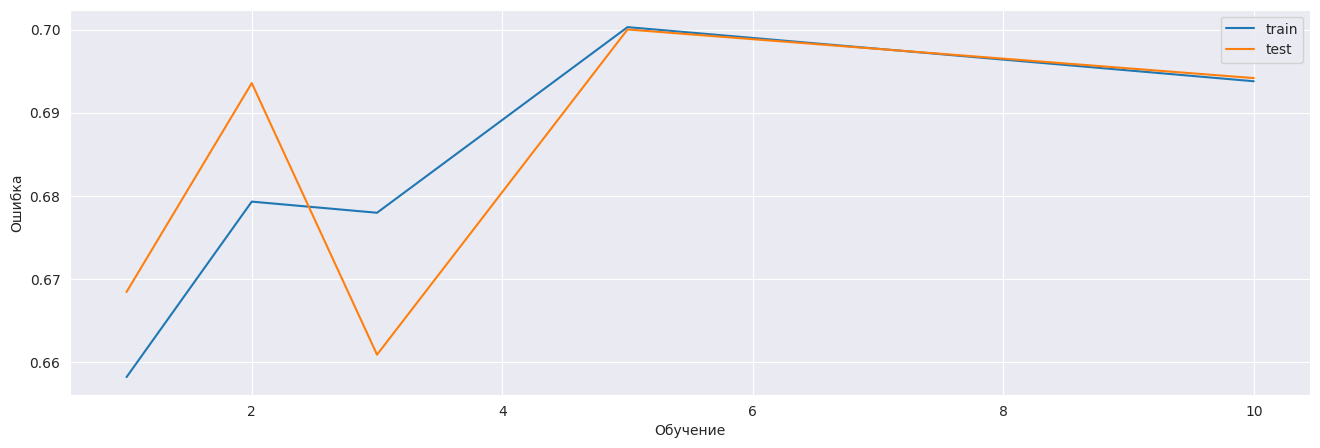

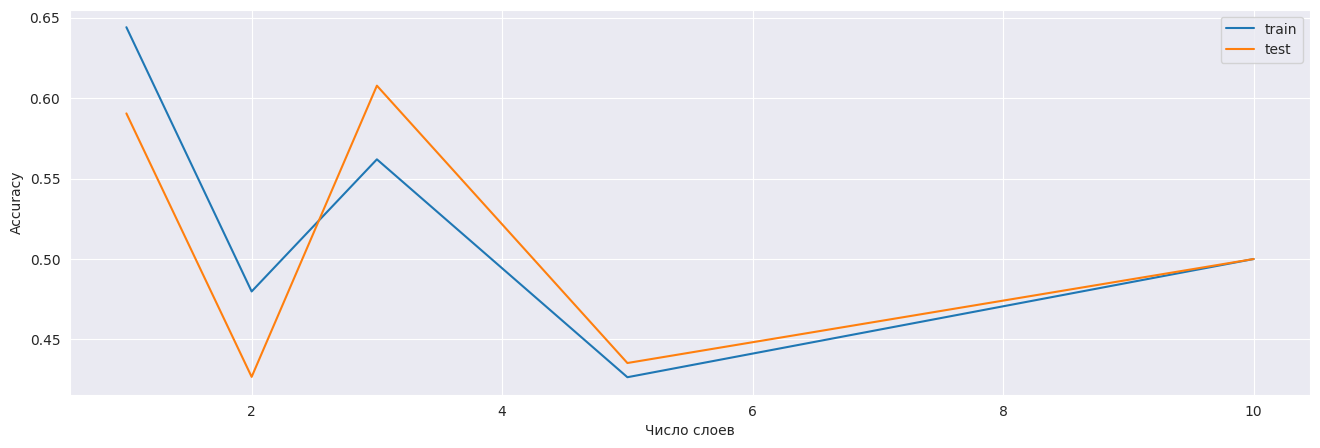

In [48]:
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'], results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'], results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'], results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'], results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

По графику видно, что увеличение количества слоев приводит с ухудшению качества и росту ошибки, но после 5 слоев идет медленное улучшение. Лучшее качество на тесте при 3 скрытых слоях с 16 нейронами: accuracy: 0.6431 - loss: 0.6537

###При 64 нейронах в слое

In [49]:
%%time
results_layers = pd.DataFrame()
n_nums = []
n_layers = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []

k_dict = {1:64, 2:64, 3:64, 5:64, 10:64}
for n in [1, 2, 3, 5, 10]:

    k = k_dict[n]
    n_nums.append(k)
    n_layers.append(n)

    model = Sequential()
    model.add(Input(shape=(53,)))
    for i in range(n):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)


results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4639 - loss: 0.7089 - val_accuracy: 0.4569 - val_loss: 0.7115
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4557 - loss: 0.7059 - val_accuracy: 0.4698 - val_loss: 0.7037
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5088 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5169 - loss: 0.6878 - val_accuracy: 0.5216 - val_loss: 0.6895
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5372 - loss: 0.6833 - val_accuracy: 0.5517 - val_loss: 0.6829
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5627 - loss: 0.6795 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5530 - loss: 0.6827 


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4911 - loss: 0.6968 - val_accuracy: 0.5000 - val_loss: 0.6886
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5405 - loss: 0.6869 - val_accuracy: 0.5172 - val_loss: 0.6843
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5460 - loss: 0.6857 - val_accuracy: 0.5474 - val_loss: 0.6802
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5793 - loss: 0.6774 - val_accuracy: 0.5603 - val_loss: 0.6765
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5573 - loss: 0.6795 - val_accuracy: 0.5560 - val_loss: 0.6728
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 0.6779 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5834 - loss: 0.6714 


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,841 (46.25 KB)

 Trainable params: 11,841 (46.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6096 - loss: 0.6724 - val_accuracy: 0.6121 - val_loss: 0.6762
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6063 - loss: 0.6734 - val_accuracy: 0.6207 - val_loss: 0.6711
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6218 - loss: 0.6696 - val_accuracy: 0.6293 - val_loss: 0.6662
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6031 - loss: 0.6644 - val_accuracy: 0.6422 - val_loss: 0.6614
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6405 - loss: 0.6570 - val_accuracy: 0.6379 - val_loss: 0.6566
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.6524 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6645 - loss: 0.6501 


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,161 (78.75 KB)

 Trainable params: 20,161 (78.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4758 - loss: 0.6987 - val_accuracy: 0.5388 - val_loss: 0.6973
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4818 - loss: 0.6968 - val_accuracy: 0.5431 - val_loss: 0.6962
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4988 - loss: 0.6962 - val_accuracy: 0.5431 - val_loss: 0.6951
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4800 - loss: 0.6950 - val_accuracy: 0.5474 - val_loss: 0.6941
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5260 - loss: 0.6935 - val_accuracy: 0.5690 - val_loss: 0.6931
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.6930 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5776 - loss: 0.6930 


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,961 (160.00 KB)

 Trainable params: 40,961 (160.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4902 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5026 - loss: 0.6943 - val_accuracy: 0.5086 - val_loss: 0.6941
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4939 - loss: 0.6941 - val_accuracy: 0.4914 - val_loss: 0.6938
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4926 - loss: 0.6938 - val_accuracy: 0.5172 - val_loss: 0.6936
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 0.6935 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4835 - loss: 0.6937 
CPU times: user 7.84 s, sys: 198 ms, total: 8.04 s
Wall time: 8.48 s


n_layer  n_num  train_loss  test_loss  train_metric  test_metric
2        3     64    0.653805   0.656628      0.634006     0.637931
3        5     64    0.693017   0.693085      0.536023     0.568965
1        2     64    0.675549   0.672783      0.559078     0.556035
0        1     64    0.674291   0.682941      0.563401     0.551724
4       10     64    0.693580   0.693567      0.498559     0.517241

#### Функция потерь + Accuracy

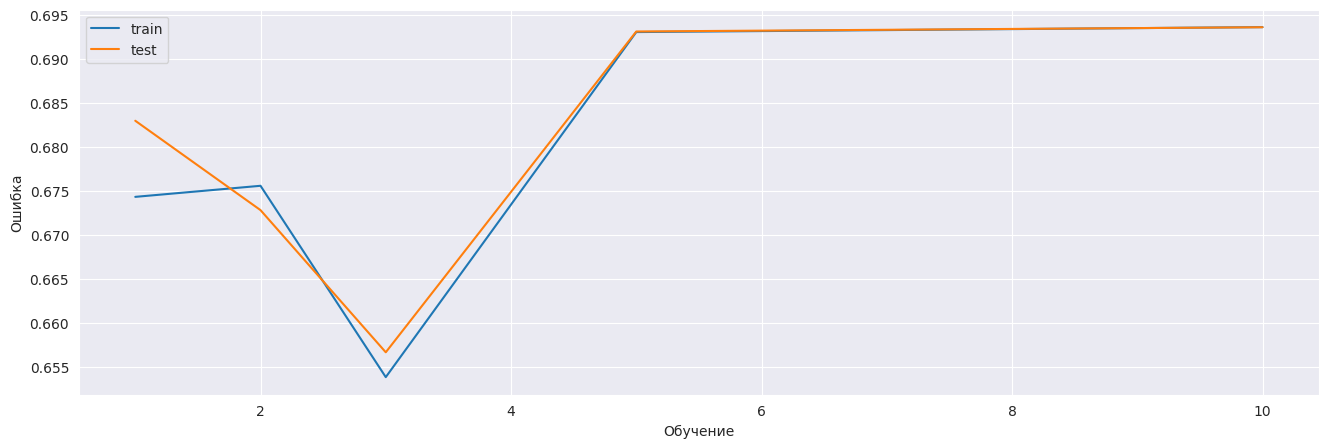

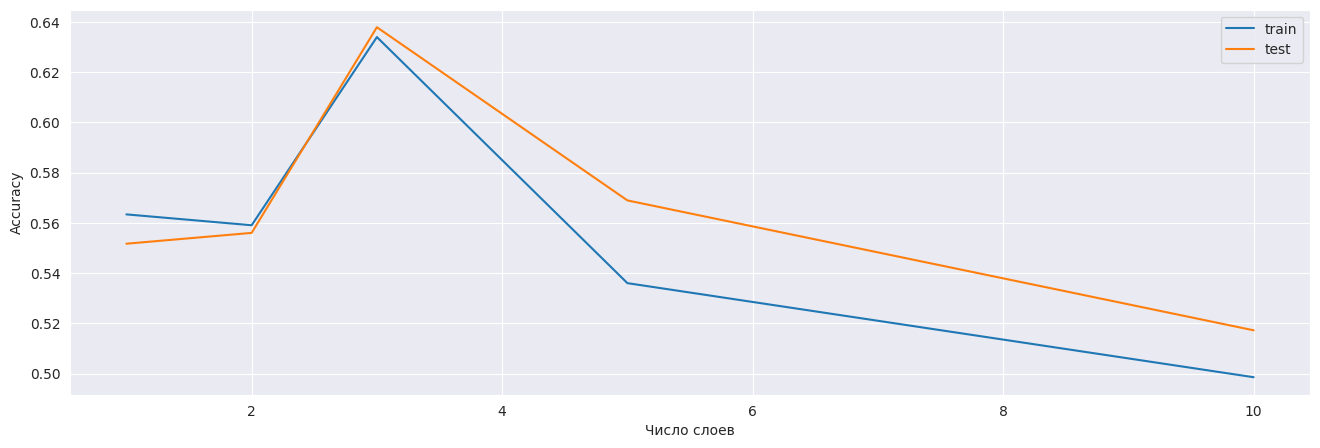

In [50]:
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'], results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'], results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'], results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'], results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

До трех скрытых слоев качество растет, после - падает. Лучшее качество на тесте - при 3 стрытых слоях с 64 нейронами: accuracy: 0.6645 - loss: 0.6501

###При 256 нейронах в слое

In [53]:
%%time
results_layers = pd.DataFrame()
n_nums = []
n_layers = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []

k_dict = {1:256, 2:256, 3:256, 4:256, 5:256, 6:256, 7:256, 8:256, 9:256, 10:256}
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

    k = k_dict[n]
    n_nums.append(k)
    n_layers.append(n)

    model = Sequential()
    model.add(Input(shape=(53,)))
    for i in range(n):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)


results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_159 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4676 - loss: 0.7145 - val_accuracy: 0.4698 - val_loss: 0.7133
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5300 - loss: 0.6972 - val_accuracy: 0.4957 - val_loss: 0.7025
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5702 - loss: 0.6872 - val_accuracy: 0.5302 - val_loss: 0.6927
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6286 - loss: 0.6760 - val_accuracy: 0.5603 - val_loss: 0.6837
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6542 - loss: 0.6661 - val_accuracy: 0.5862 - val_loss: 0.6753
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.6629 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5824 - loss: 0.6770 


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,873 (312.00 KB)

 Trainable params: 79,873 (312.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4737 - loss: 0.6923 - val_accuracy: 0.5302 - val_loss: 0.6796
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5056 - loss: 0.6810 - val_accuracy: 0.5388 - val_loss: 0.6743
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5138 - loss: 0.6756 - val_accuracy: 0.5603 - val_loss: 0.6691
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5211 - loss: 0.6751 - val_accuracy: 0.5733 - val_loss: 0.6640
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5396 - loss: 0.6697 - val_accuracy: 0.5819 - val_loss: 0.6590
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 0.6645 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5937 - loss: 0.6543 


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_164 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,665 (569.00 KB)

 Trainable params: 145,665 (569.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5057 - loss: 0.6924 - val_accuracy: 0.6078 - val_loss: 0.6904
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6020 - loss: 0.6855 - val_accuracy: 0.6681 - val_loss: 0.6845
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6684 - loss: 0.6797 - val_accuracy: 0.7026 - val_loss: 0.6792
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7159 - loss: 0.6735 - val_accuracy: 0.6940 - val_loss: 0.6741
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7238 - loss: 0.6670 - val_accuracy: 0.6767 - val_loss: 0.6692
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7327 - loss: 0.6642 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6644 - loss: 0.6699 


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,457 (826.00 KB)

 Trainable params: 211,457 (826.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5120 - loss: 0.6897 - val_accuracy: 0.5086 - val_loss: 0.6827
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5087 - loss: 0.6868 - val_accuracy: 0.5086 - val_loss: 0.6800
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5155 - loss: 0.6820 - val_accuracy: 0.5086 - val_loss: 0.6773
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4944 - loss: 0.6842 - val_accuracy: 0.5086 - val_loss: 0.6745
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5249 - loss: 0.6758 - val_accuracy: 0.5259 - val_loss: 0.6716
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5346 - loss: 0.6751 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5567 - loss: 0.6672 


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_173 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,249 (1.06 MB)

 Trainable params: 277,249 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6171 - loss: 0.6886 - val_accuracy: 0.6595 - val_loss: 0.6894
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6282 - loss: 0.6859 - val_accuracy: 0.6552 - val_loss: 0.6862
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6687 - loss: 0.6823 - val_accuracy: 0.6379 - val_loss: 0.6831
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6416 - loss: 0.6788 - val_accuracy: 0.6509 - val_loss: 0.6799
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6665 - loss: 0.6756 - val_accuracy: 0.6336 - val_loss: 0.6768
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6663 - loss: 0.6730 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6649 - loss: 0.6745 


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_179 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,041 (1.31 MB)

 Trainable params: 343,041 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5139 - loss: 0.6964 - val_accuracy: 0.4957 - val_loss: 0.6967
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5143 - loss: 0.6954 - val_accuracy: 0.4871 - val_loss: 0.6954
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4950 - loss: 0.6948 - val_accuracy: 0.5216 - val_loss: 0.6942
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5371 - loss: 0.6930 - val_accuracy: 0.5690 - val_loss: 0.6931
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6024 - loss: 0.6920 - val_accuracy: 0.6293 - val_loss: 0.6920
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6324 - loss: 0.6912 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6189 - loss: 0.6924 


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,833 (1.56 MB)

 Trainable params: 408,833 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4902 - loss: 0.6872 - val_accuracy: 0.5000 - val_loss: 0.6844
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4903 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6832
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5035 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.6819
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5168 - loss: 0.6806 - val_accuracy: 0.4957 - val_loss: 0.6805
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4956 - loss: 0.6823 - val_accuracy: 0.5000 - val_loss: 0.6790
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6797 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5349 - loss: 0.6760 


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_194 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,625 (1.81 MB)

 Trainable params: 474,625 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5032 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5049 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6913
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5023 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5206 - loss: 0.6909 - val_accuracy: 0.5129 - val_loss: 0.6907
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5211 - loss: 0.6906 - val_accuracy: 0.5388 - val_loss: 0.6903
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5338 - loss: 0.6904
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5681 - loss: 0.6897 


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_203 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 540,417 (2.06 MB)

 Trainable params: 540,417 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4910 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5156 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5023 - loss: 0.6917 - val_accuracy: 0.5302 - val_loss: 0.6905
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5202 - loss: 0.6911 - val_accuracy: 0.5560 - val_loss: 0.6902
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5423 - loss: 0.6908 - val_accuracy: 0.5560 - val_loss: 0.6899
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5515 - loss: 0.6907
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5886 - loss: 0.6897 


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_213 (Dense)                    │ (None, 256)                 │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 606,209 (2.31 MB)

 Trainable params: 606,209 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4948 - loss: 0.6935 - val_accuracy: 0.5043 - val_loss: 0.6932
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5005 - loss: 0.6934 - val_accuracy: 0.5086 - val_loss: 0.6929
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5289 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6927
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5827 - loss: 0.6929 - val_accuracy: 0.5948 - val_loss: 0.6924
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6326 - loss: 0.6926 - val_accuracy: 0.6336 - val_loss: 0.6922
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6171 - loss: 0.6922 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6040 - loss: 0.6923 
CPU times: user 22.4 s, sys: 707 ms, total: 23.1 s
Wall time: 24.9 s


n_layer  n_num  train_loss  test_loss  train_metric  test_metric
2        3    256    0.664255   0.669164      0.723343     0.676724
4        5    256    0.673148   0.676762      0.661383     0.633621
9       10    256    0.692195   0.692169      0.626801     0.633621
5        6    256    0.691286   0.692007      0.629683     0.629310
0        1    256    0.661294   0.675316      0.659942     0.586207
1        2    256    0.662400   0.658999      0.560519     0.581897
8        9    256    0.690631   0.689927      0.550432     0.556035
7        8    256    0.690432   0.690309      0.531700     0.538793
3        4    256    0.674905   0.671630      0.533141     0.525862
6        7    256    0.679682   0.679040      0.502882     0.500000

#### Функция потерь + Accuracy

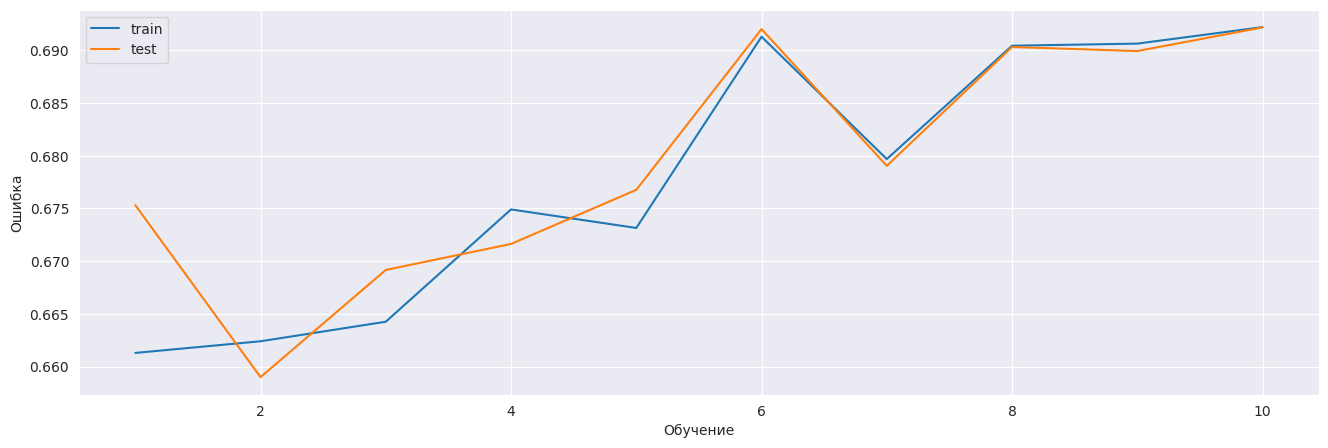

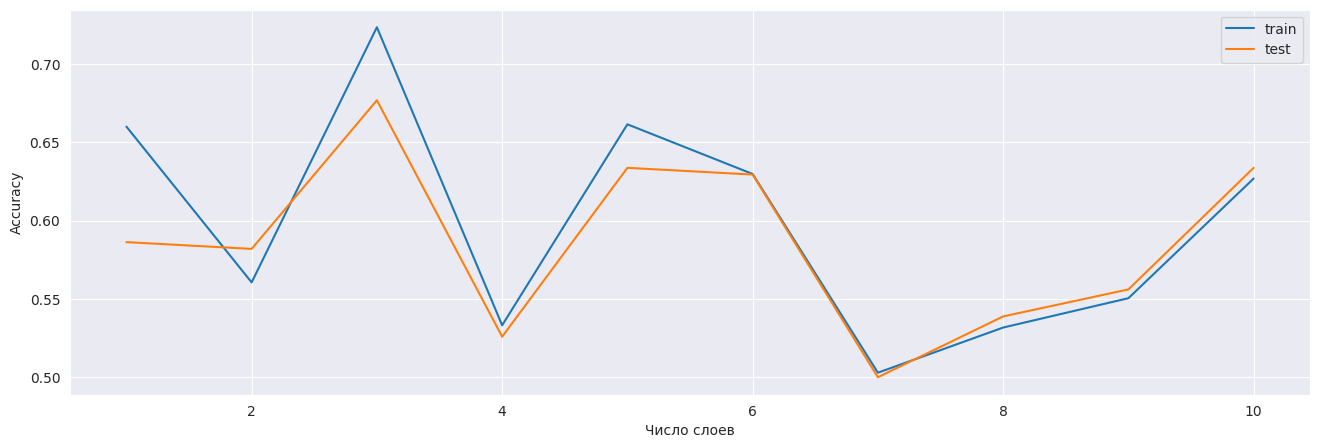

In [54]:
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'], results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'], results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'], results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'], results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

При увеличении чила скрытых слоев ошибка растет. Лучшая модель на тесте - при 2 скрытых слоях: accuracy: 0.5937 - loss: 0.6543

Имеет смысл использовать 64 нейрона и 3 слоя.

## Подбор оптимизатора:

Оптимизатор: SGD
Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5605 - loss: 0.6841 - val_accuracy: 0.5603 - val_loss: 0.6845
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5402 - loss: 0.6812 - val_accuracy: 0.5776 - val_loss: 0.6772
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5795 - loss: 0.6741 - val_accuracy: 0.6078 - val_loss: 0.6708
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6091 - loss: 0.6664 - val_accuracy: 0.6207 - val_loss: 0.6647
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6507 - loss: 0.6551 - val_accuracy: 0.6207 - val_loss: 0.6590
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6077 - loss: 0.6581 
Качество на тесте: 0.658981204032898, 0.6206896305084229
Оптимизатор: rmsprop
Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6288 - loss: 0.6412 - val_accuracy: 0.7974 - val_loss: 0.5424
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8013 - loss: 0.50

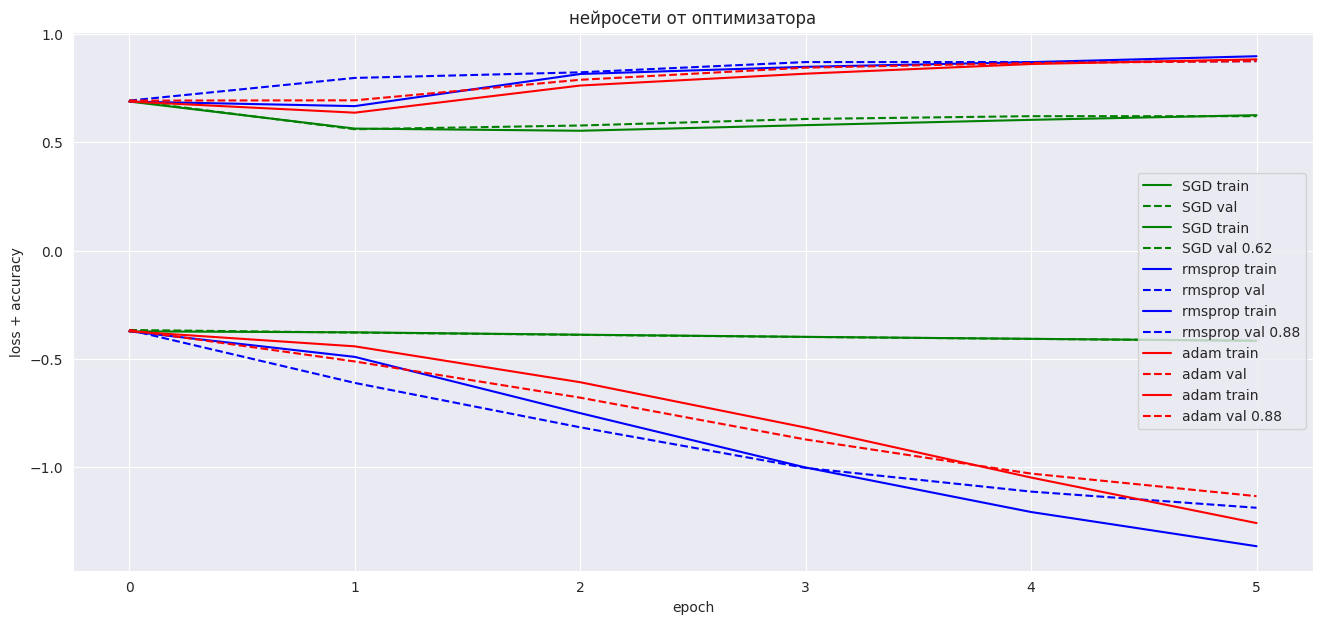

CPU times: user 7.81 s, sys: 240 ms, total: 8.05 s
Wall time: 10.9 s


In [57]:
%%time

model = Sequential([
    Input(shape=(53,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.save_weights('model.weights.h5')

models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 5
batch_size = 64

epoch = np.arange(num_epochs + 1)

for i, i_optim in enumerate([SGD(),
                             RMSprop(),
                             Adam()]):
    print(f'Оптимизатор: {i_optim.get_config()["name"]}')

    model_i = Sequential([
    Input(shape=(53,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

    model_i.load_weights('model.weights.h5')

    model_i.compile(
        optimizer=i_optim,
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )

    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    loss, metric = model_i.evaluate(X_test, y_test, batch_size=64)
    print(f'Качество на тесте: {loss}, {metric}')

    models[i_optim.get_config()['name']] = model_i

    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

    plt.plot(epoch, ([h0_train[0]] + h.history['accuracy']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, ([h0_val[0]] + h.history['val_accuracy']),
             '--', c=colors[i],
             label=f'{model_i.optimizer.get_config()["name"]} val {metric:.2f}')

plt.legend()
plt.title('нейросети от оптимизатора')
plt.xlabel('epoch')
plt.ylabel('loss + accuracy')
plt.show()

После 5 эпох лучшее качество на тесте у нейросети с оптимизатором adam.

In [61]:
model_i = models['adam']

In [62]:
model_i.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 0.0010000000474974513,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

## Попробуем добавить слои Dropout и регуляризатор и обучить модель на большем количестве эпох.

In [63]:
model = Sequential([
    Input(shape=(53,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4837 - loss: 2.0014 - val_accuracy: 0.5905 - val_loss: 1.8748
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5274 - loss: 1.8561 - val_accuracy: 0.7198 - val_loss: 1.7845
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6209 - loss: 1.7577 - val_accuracy: 0.7500 - val_loss: 1.6849
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6715 - loss: 1.6636 - val_accuracy: 0.7888 - val_loss: 1.5639
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7128 - loss: 1.5729 - val_accuracy: 0.8362 - val_loss: 1.4355
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7773 - loss: 1.4333 - val_accuracy: 0.8233 - val_loss: 1.3105
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8426 - loss: 1.3110 - val_accuracy: 0.8621 - val_loss: 1.2016
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8440 - loss: 1.2266 - val_accuracy: 0.8578 -

#### Функция потерь

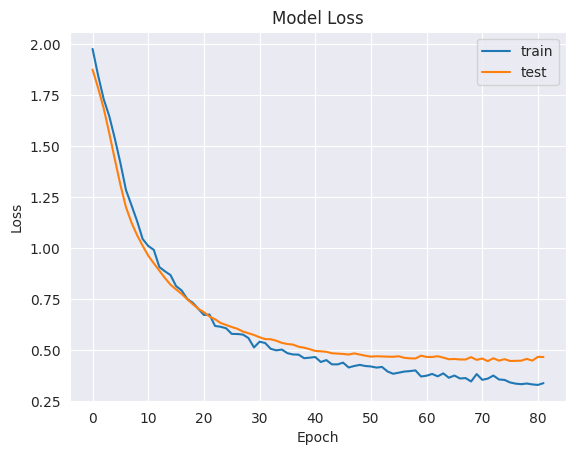

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

После 82 эпох ошибка на тесте упала до 0.4676, а accuracy на тестовой выборке выросла до 0.9310.

Несмотря на улучшение нейросети, лучшей моделью остался случайный лес.

## Важность признаков для лучшей модели - Random Forest

In [65]:
importances = pd.Series(rf_best_model.feature_importances_, index = X.columns.values).sort_values(ascending=False)

In [66]:
importances

Appendix_Diameter                   0.298739
Length_of_Stay                      0.097570
Appendix_on_US                      0.067159
Surrounding_Tissue_Reaction         0.057080
Ipsilateral_Rebound_Tenderness      0.053994
WBC_Count                           0.045294
Peritonitis                         0.036520
CRP                                 0.034796
Appendix_Wall_Layers                0.029258
Alvarado_Score                      0.025235
Paedriatic_Appendicitis_Score       0.024858
Neutrophil_Percentage               0.019780
Height                              0.011977
Neutrophilia                        0.011552
BMI                                 0.010746
Thrombocyte_Count                   0.010161
Hemoglobin                          0.010060
Age                                 0.009670
Weight                              0.009357
Body_Temperature                    0.009147
Ketones_in_Urine                    0.009099
Perforation                         0.007862
RDW                                 0.007000
RBC_Count                           0.006784
Appendicolith                       0.006250
WBC_in_Urine                        0.005697
Loss_of_Appetite                    0.005674
Appendicular_Abscess                0.005567
Coughing_Pain                       0.005263
Target_Sign                         0.005209
Stool                               0.005170
RBC_in_Urine                        0.004579
Lymph_Nodes_Location                0.004573
Dysuria                             0.004492
Contralateral_Rebound_Tenderness    0.004268
Free_Fluids                         0.003891
Nausea                              0.003779
Psoas_Sign                          0.003765
Migratory_Pain                      0.003574
Perfusion                           0.003306
Pathological_Lymph_Nodes            0.003221
Gynecological_Findings              0.003130
Meteorism                           0.002474
Ileus                               0.002059
Sex                                 0.001958
Lower_Right_Abd_Pain                0.001555
Bowel_Wall_Thickening               0.001491
Conglomerate_of_Bowel_Loops         0.001250
Enteritis                           0.001234
Segmented_Neutrophils               0.001117
Coprostasis                         0.001009
US_Performed                        0.000619
Abscess_Location                    0.000126
dtype: float64

Самый важный признак для случайного леса - диаметр аппендикса.

# Выводы:

1. Если не удалять признаки с больших количеством пропусков, а заменить их на какое-то значение, а также не удалять признаки, коррелирующие менее, чем на 99%, то лучшей моделью на этом датасете стал случайный лес, который получил следующие метрики на тесте: Accuracy score - 97.84%, Precision score - 97.44%, Recall score - 98.28% и Loss < 0.025.
2. Второй по качеству стала нейросеть keras с тремя скрытыми слоями и 64 нейонами в каждом, которая получила следующие метрики на тесте: Accuracy - 93.1% и Loss - 0.4676.
3. Возможно, что метрики были бы лучше, если удалить фичи с большим количеством пропусков и заменить остальные пропуски другим способом.
4. Самым важным признаком для модели-победителя (случайного леса) стал диаметр аппендикса.
5. Также можно попробовать удалить коррелирующие признаки для улучшения качества.
6. При прочих равных случайный лес работает лучше даже на плохо очищенных данных данного датасета.